In [1]:
# List of imports

import networkx as nx
import numpy as np
import pickle
from pathlib import Path
import os
import torch
import time
import dgl

import WLColorRefinement.WLColorRefinement as wl
from data.molecules import MoleculeDataset
import WLColorRefinement.create_reduced_graph as crg

Using backend: pytorch


In [2]:
"""
    Funtion to draw the graph\n",
"""
# def drawGraph(G):
#     nx_G = G.to_networkx().to_undirected()
#     pos = nx.kamada_kawai_layout(nx_G)
#     nx.draw(nx_G, pos, with_labels=True, node_color=G.ndata['feat'])

'\n    Funtion to draw the graph\n",\n'

In [3]:
ZINC_original = MoleculeDataset('ZINC')

[I] Loading dataset ZINC...
train, test, val sizes : 10000 1000 1000
[I] Finished loading.
[I] Data load time: 7.5921s


Information about G
G.nodes() =  
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
G.ndata[feat] =  
 tensor([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 5, 1, 1, 0, 0, 2, 0, 0,
        0, 0, 0, 0, 0])
G.edges() =  
 (tensor([ 0,  1,  1,  2,  2,  2,  3,  3,  4,  4,  5,  5,  5,  6,  6,  7,  7,  8,
         8,  8,  9, 10, 10, 10, 11, 11, 12, 12, 12, 13, 13, 14, 14, 15, 15, 15,
        16, 16, 16, 16, 17, 18, 19, 19, 19, 20, 20, 21, 21, 21, 22, 23, 23, 24,
        24, 25, 25, 26, 26, 27, 27, 27, 28, 28]), tensor([ 1,  0,  2,  1,  3, 28,  2,  4,  3,  5,  4,  6, 27,  5,  7,  6,  8,  7,
         9, 10,  8,  8, 11, 27, 10, 12, 11, 13, 26, 12, 14, 13, 15, 14, 16, 25,
        15, 17, 18, 19, 16, 16, 16, 20, 24, 19, 21, 20, 22, 23, 21, 21, 24, 19,
        23, 15, 26, 12, 25,  5, 10, 28,  2, 27]))
G.edata() =  
 {'feat': tensor([1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1,
        1

C:\Users\User1\Documents\GitHub\ResearchProject1\WLColorRefinement\create_reduced_graph.py:323: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  reduced_graph.ndata['feat'] = torch.tensor(new_features)


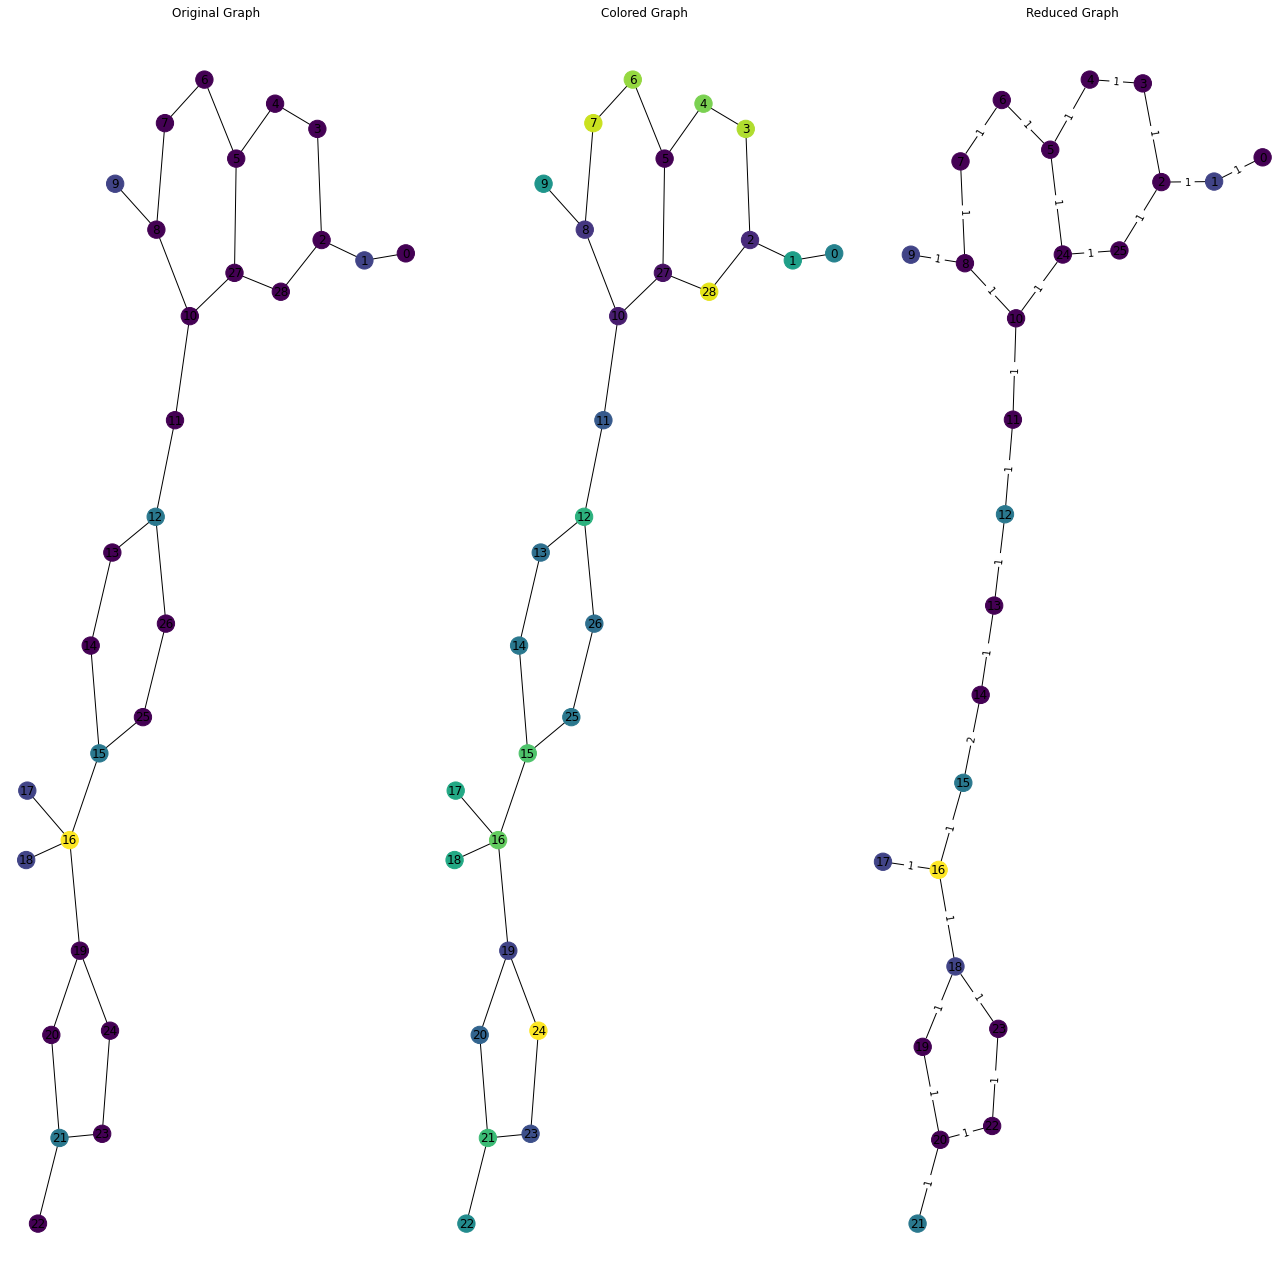

Information about C
C.nodes() =  
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
C.ndata[feat] =  
 tensor([230, 233, 222, 241, 239, 219, 240, 242, 223, 232, 221, 226, 235, 228,
        229, 237, 238, 234, 234, 224, 227, 236, 231, 225, 244, 229, 228, 220,
        243], dtype=torch.int32)
C.edges() =  
 (tensor([ 0,  1,  1,  2,  2,  2,  3,  3,  4,  4,  5,  5,  5,  6,  6,  7,  7,  8,
         8,  8,  9, 10, 10, 10, 11, 11, 12, 12, 12, 13, 13, 14, 14, 15, 15, 15,
        16, 16, 16, 16, 17, 18, 19, 19, 19, 20, 20, 21, 21, 21, 22, 23, 23, 24,
        24, 25, 25, 26, 26, 27, 27, 27, 28, 28]), tensor([ 1,  0,  2,  1,  3, 28,  2,  4,  3,  5,  4,  6, 27,  5,  7,  6,  8,  7,
         9, 10,  8,  8, 11, 27, 10, 12, 11, 13, 26, 12, 14, 13, 15, 14, 16, 25,
        15, 17, 18, 19, 16, 16, 16, 20, 24, 19, 21, 20, 22, 23, 21, 21, 24, 19,
        23, 15, 26, 12, 25,  5, 10, 28,  2, 27]))
C.edata() =  
 {'feat': tens

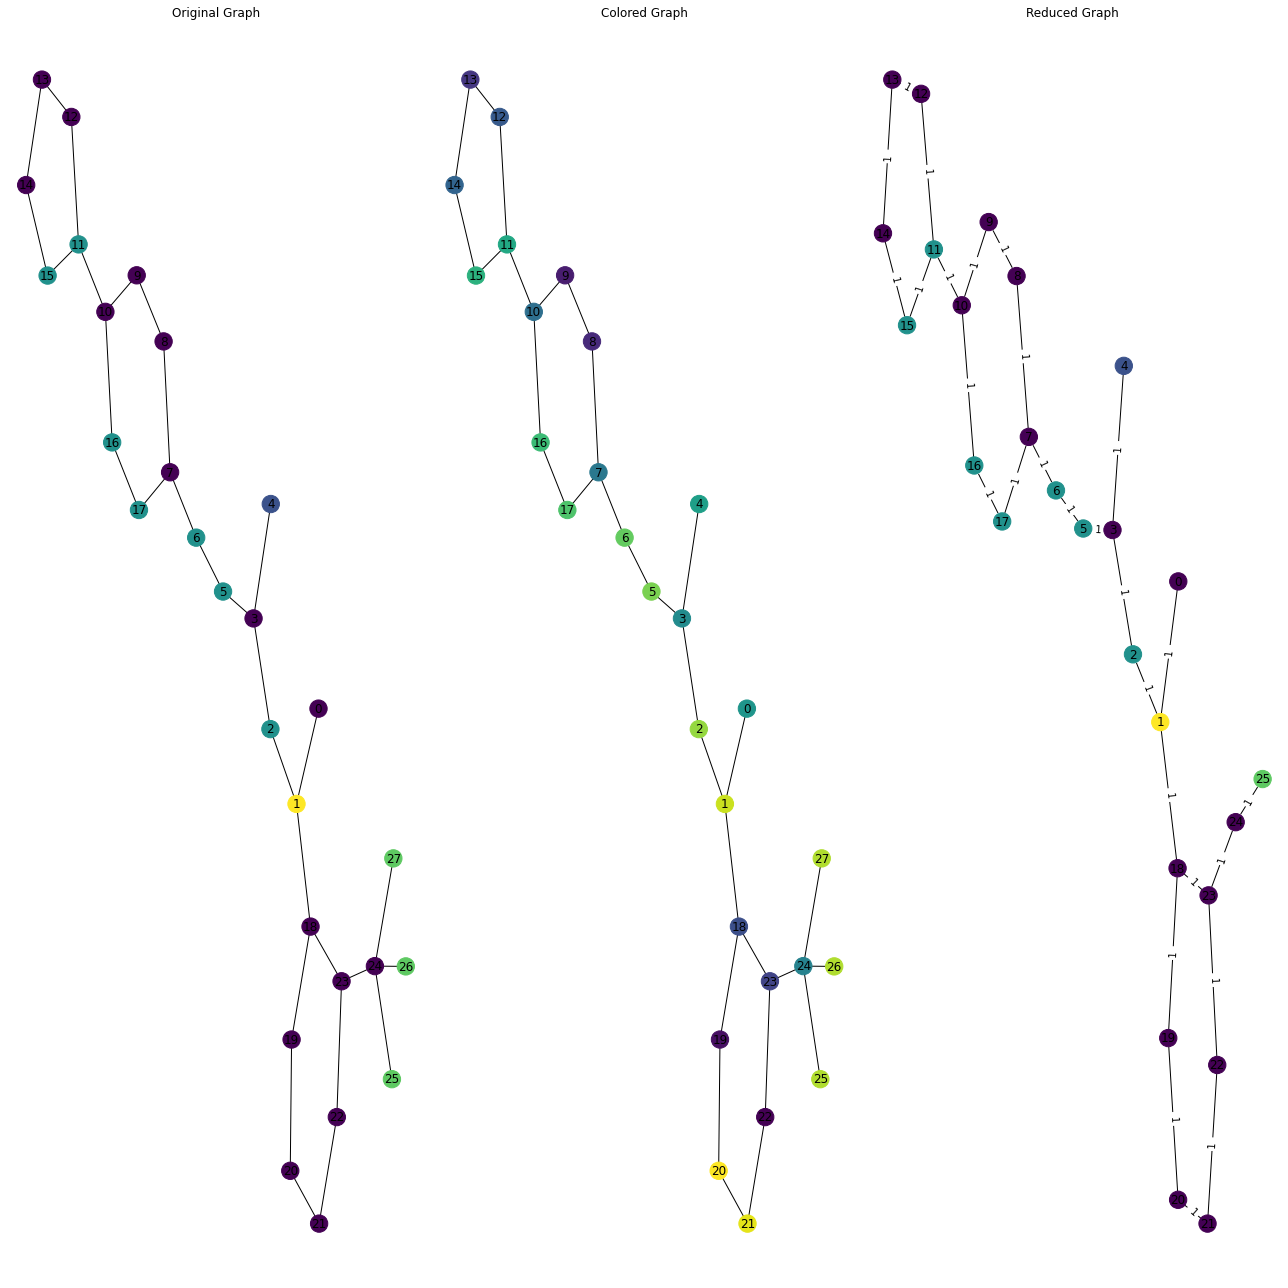

Information about C
C.nodes() =  
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27])
C.ndata[feat] =  
 tensor([232, 242, 240, 231, 233, 239, 238, 229, 222, 221, 228, 234, 226, 223,
        227, 235, 236, 237, 225, 220, 244, 243, 219, 224, 230, 241, 241, 241],
       dtype=torch.int32)
C.edges() =  
 (tensor([ 0,  1,  1,  1,  2,  2,  3,  3,  3,  4,  5,  5,  6,  6,  7,  7,  7,  8,
         8,  9,  9, 10, 10, 10, 11, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16,
        16, 17, 17, 18, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 23, 24,
        24, 24, 24, 25, 26, 27]), tensor([ 1,  0,  2, 18,  1,  3,  2,  4,  5,  3,  3,  6,  5,  7,  6,  8, 17,  7,
         9,  8, 10,  9, 11, 16, 10, 12, 15, 11, 13, 12, 14, 13, 15, 11, 14, 10,
        17,  7, 16,  1, 19, 23, 18, 20, 19, 21, 20, 22, 21, 23, 18, 22, 24, 23,
        25, 26, 27, 24, 24, 24]))
C.edata() =  
 {'feat': tensor([1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,

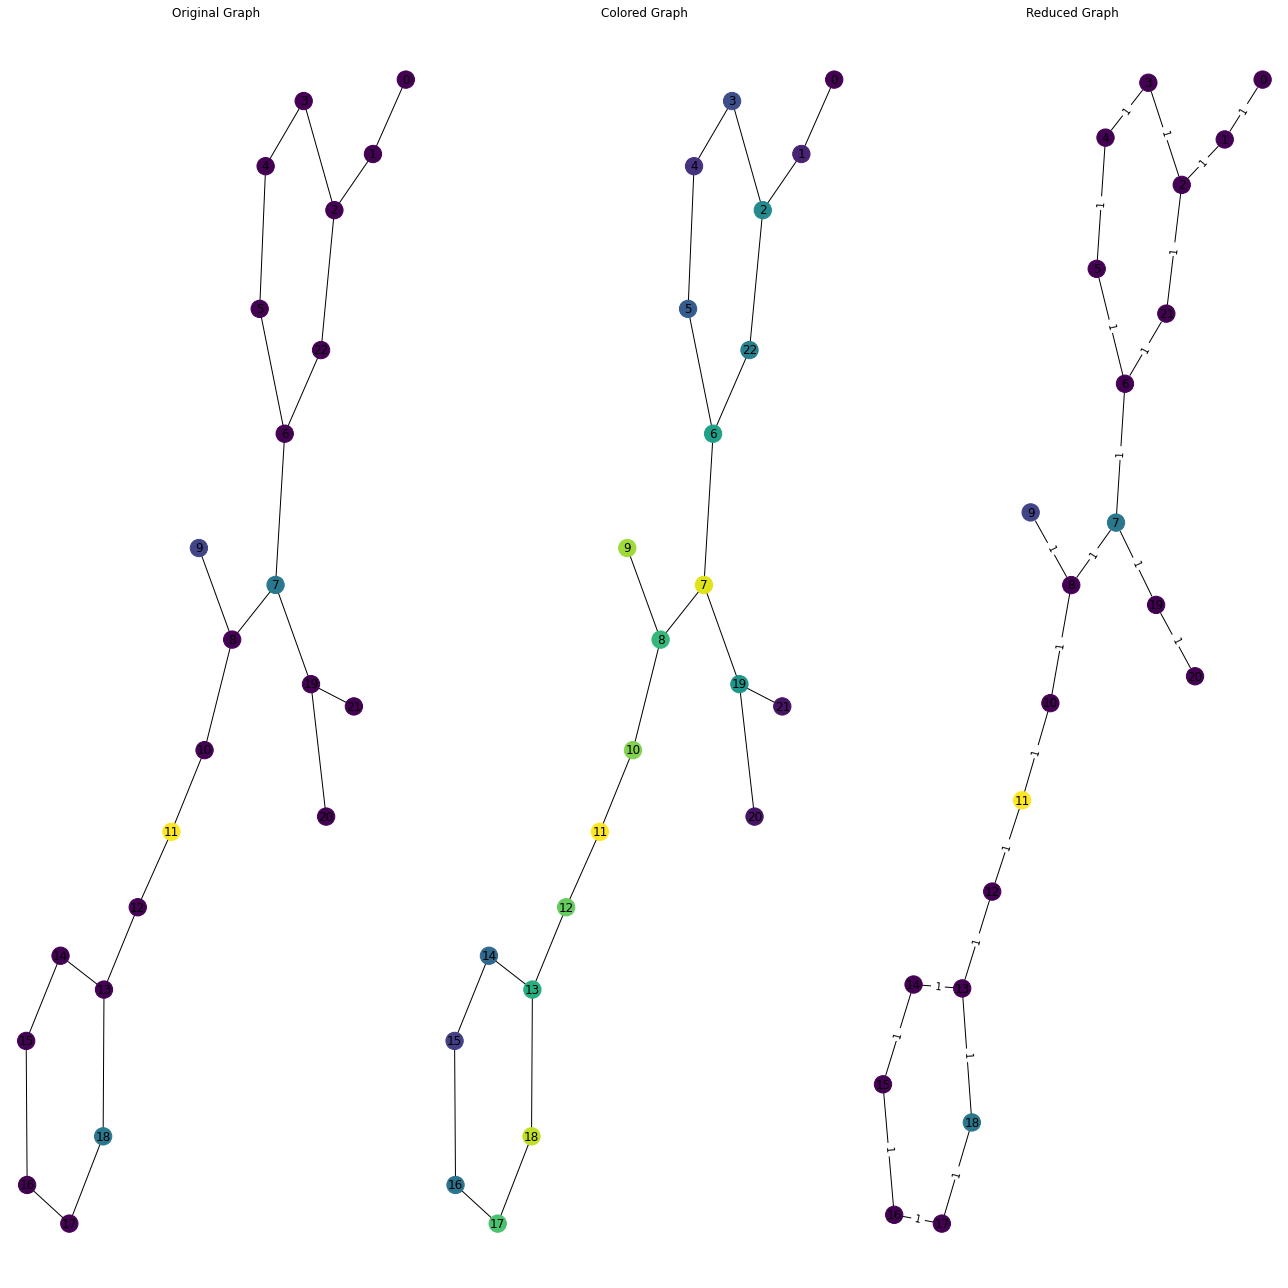

Information about C
C.nodes() =  
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22])
C.ndata[feat] =  
 tensor([186, 188, 196, 191, 189, 192, 198, 206, 200, 204, 203, 207, 202, 199,
        193, 190, 194, 201, 205, 197, 187, 187, 195], dtype=torch.int32)
C.edges() =  
 (tensor([ 0,  1,  1,  2,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  6,  7,  7,  7,
         8,  8,  8,  9, 10, 10, 11, 11, 12, 12, 13, 13, 13, 14, 14, 15, 15, 16,
        16, 17, 17, 18, 18, 19, 19, 19, 20, 21, 22, 22]), tensor([ 1,  0,  2,  1,  3, 22,  2,  4,  3,  5,  4,  6,  5,  7, 22,  6,  8, 19,
         7,  9, 10,  8,  8, 11, 10, 12, 11, 13, 12, 14, 18, 13, 15, 14, 16, 15,
        17, 16, 18, 13, 17,  7, 20, 21, 19, 19,  2,  6]))
C.edata() =  
 {'feat': tensor([3, 3, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1,
        1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2])} 

Information about F
F.nodes() =  
 tensor([ 0,

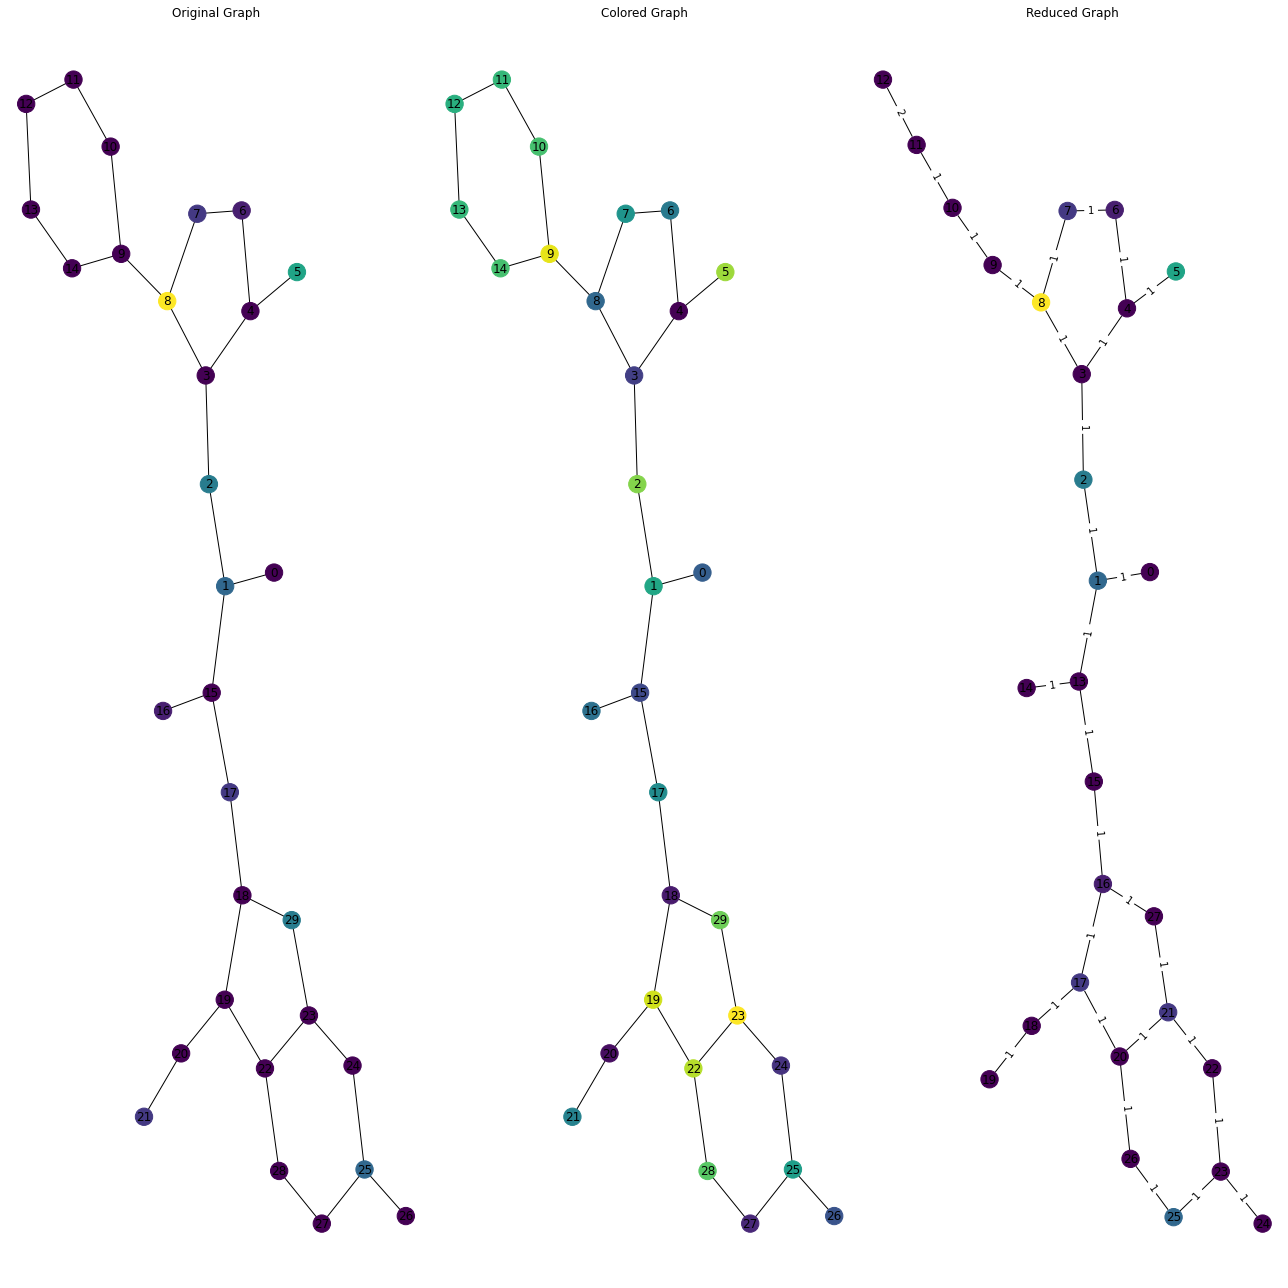

Information about C
C.nodes() =  
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])
C.ndata[feat] =  
 tensor([254, 262, 268, 251, 246, 269, 257, 260, 255, 272, 265, 264, 263, 264,
        265, 252, 256, 259, 248, 271, 247, 258, 270, 273, 250, 261, 253, 249,
        266, 267], dtype=torch.int32)
C.edges() =  
 (tensor([ 0,  1,  1,  1,  2,  2,  3,  3,  3,  4,  4,  4,  5,  6,  6,  7,  7,  8,
         8,  8,  9,  9,  9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 15,
        16, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 21, 22, 22, 22, 23, 23, 23,
        24, 24, 25, 25, 25, 26, 27, 27, 28, 28, 29, 29]), tensor([ 1,  0,  2, 15,  1,  3,  2,  4,  8,  3,  5,  6,  4,  4,  7,  6,  8,  3,
         7,  9,  8, 10, 14,  9, 11, 10, 12, 11, 13, 12, 14,  9, 13,  1, 16, 17,
        15, 15, 18, 17, 19, 29, 18, 20, 22, 19, 21, 20, 19, 23, 28, 22, 24, 29,
        23, 25, 24, 26, 27, 25, 25, 28, 22, 27, 18, 23]))
C.e

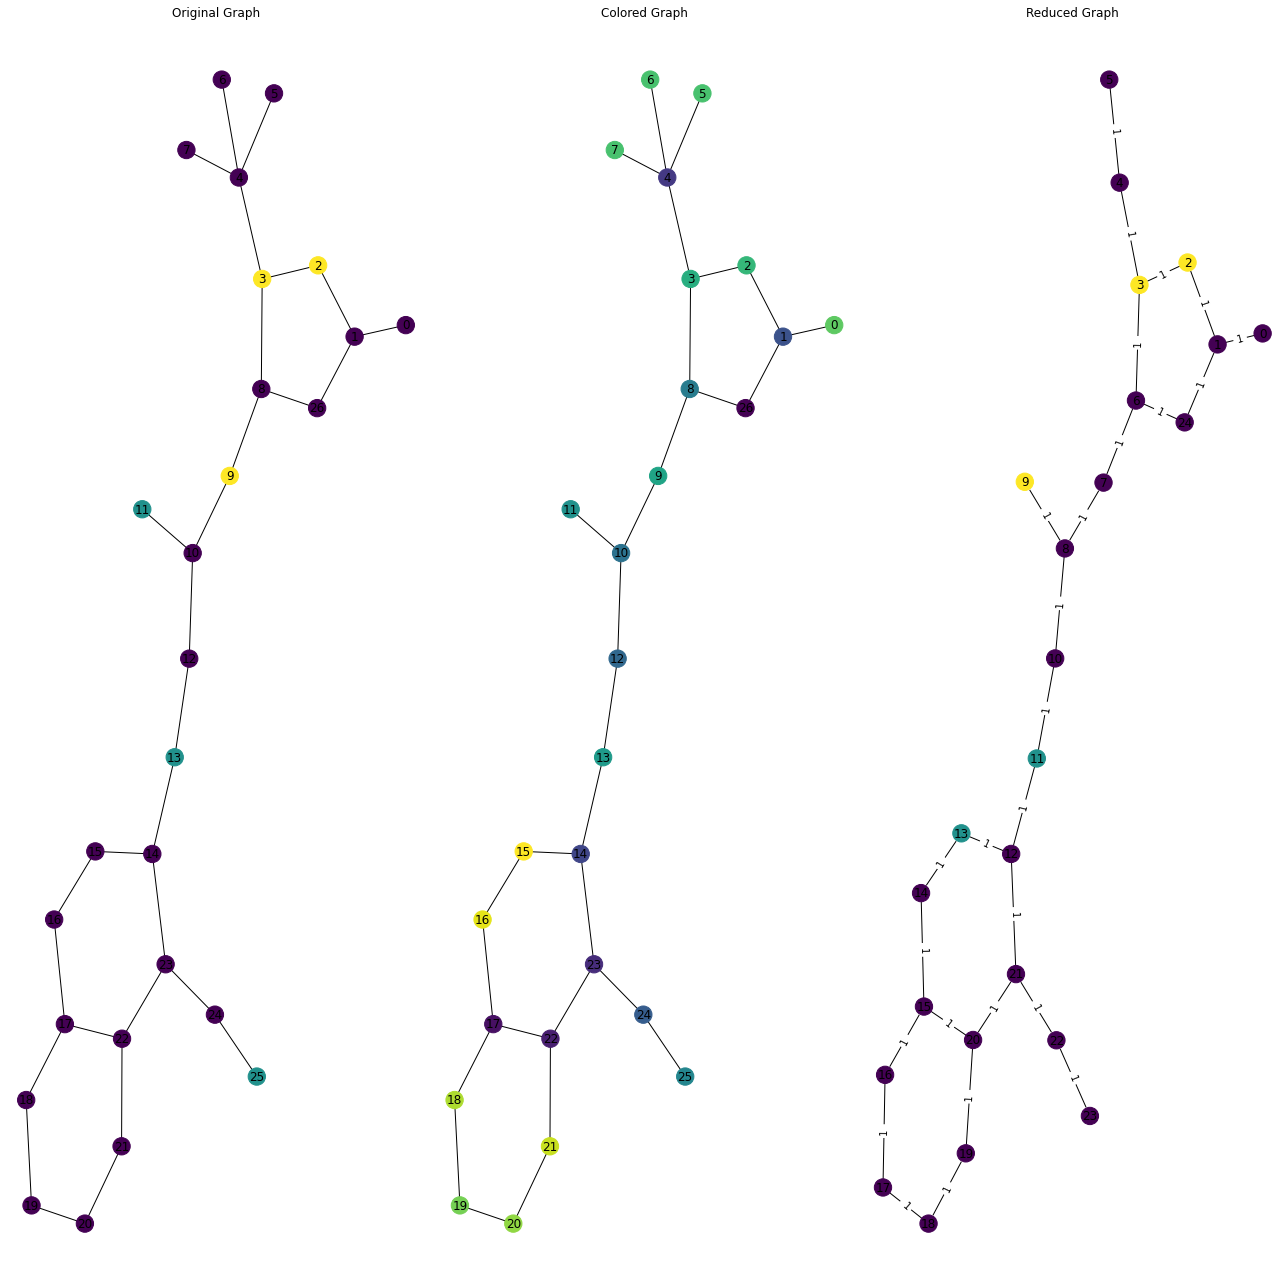

Information about C
C.nodes() =  
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26])
C.ndata[feat] =  
 tensor([229, 217, 227, 226, 215, 228, 228, 228, 221, 225, 220, 223, 219, 224,
        216, 235, 234, 212, 232, 230, 231, 233, 213, 214, 218, 222, 211],
       dtype=torch.int32)
C.edges() =  
 (tensor([ 0,  1,  1,  1,  2,  2,  3,  3,  3,  4,  4,  4,  4,  5,  6,  7,  8,  8,
         8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 14, 14, 14, 15, 15, 16, 16,
        17, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 22, 23, 23, 23, 24,
        24, 25, 26, 26]), tensor([ 1,  0,  2, 26,  1,  3,  2,  4,  8,  3,  5,  6,  7,  4,  4,  4,  3,  9,
        26,  8, 10,  9, 11, 12, 10, 10, 13, 12, 14, 13, 15, 23, 14, 16, 15, 17,
        16, 18, 22, 17, 19, 18, 20, 19, 21, 20, 22, 17, 21, 23, 14, 22, 24, 23,
        25, 24,  1,  8]))
C.edata() =  
 {'feat': tensor([1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 

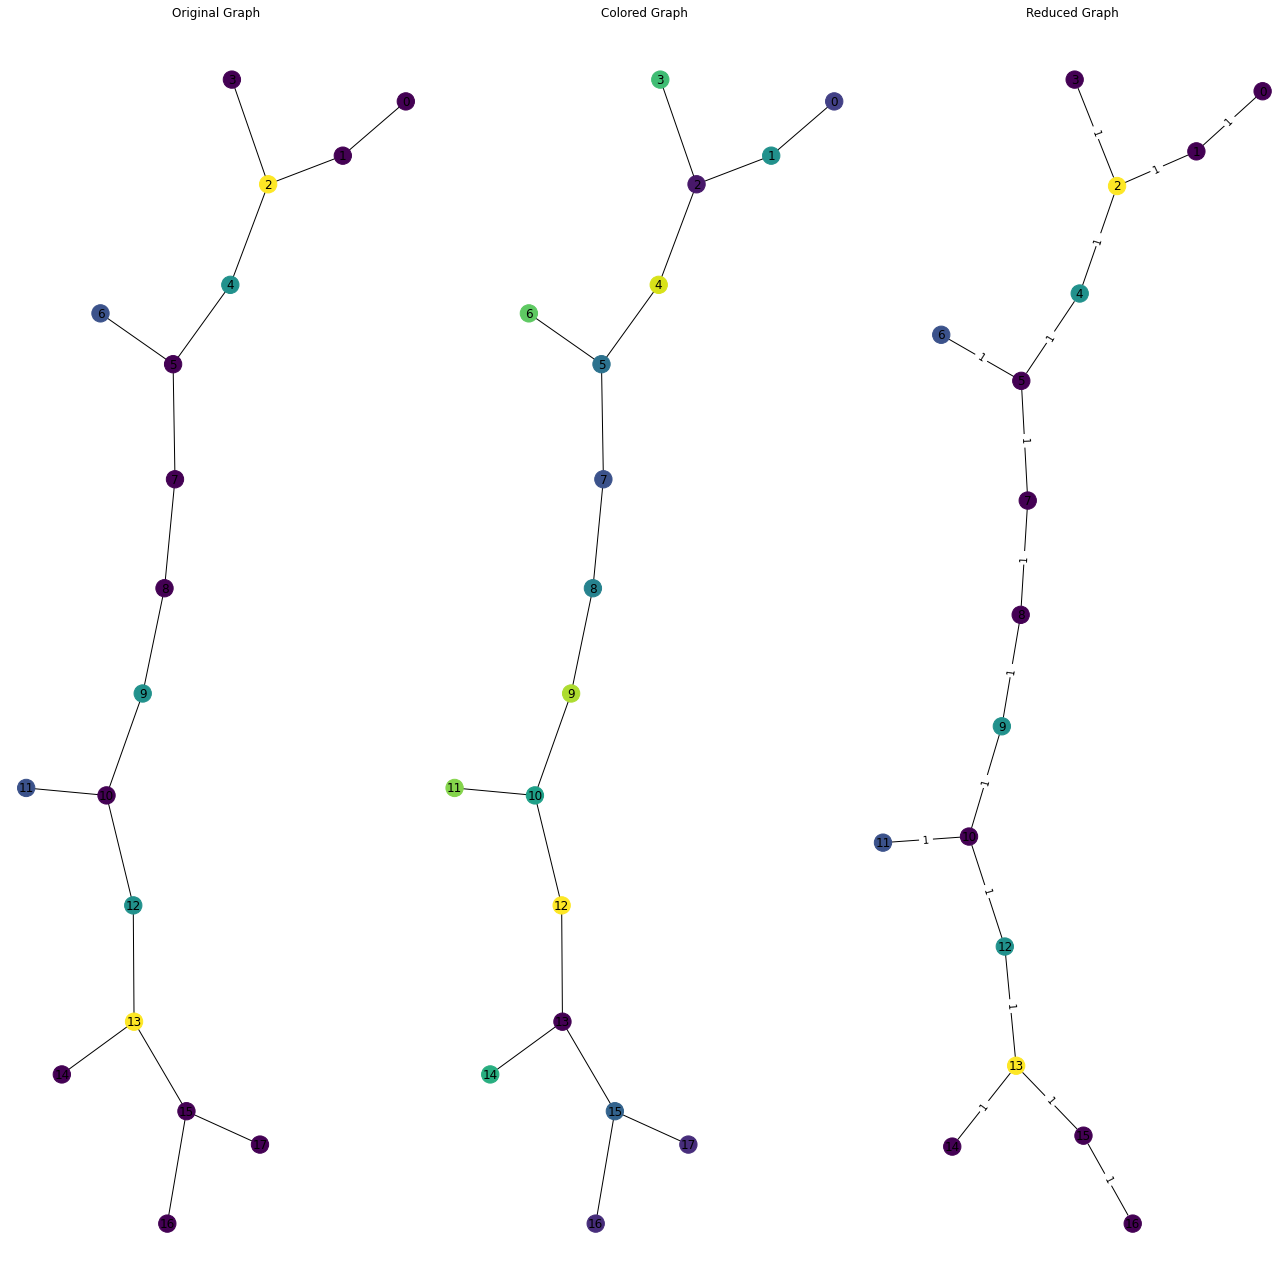

Information about C
C.nodes() =  
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])
C.ndata[feat] =  
 tensor([151, 156, 149, 159, 163, 154, 160, 152, 155, 162, 157, 161, 164, 148,
        158, 153, 150, 150], dtype=torch.int32)
C.edges() =  
 (tensor([ 0,  1,  1,  2,  2,  2,  3,  4,  4,  5,  5,  5,  6,  7,  7,  8,  8,  9,
         9, 10, 10, 10, 11, 12, 12, 13, 13, 13, 14, 15, 15, 15, 16, 17]), tensor([ 1,  0,  2,  1,  3,  4,  2,  2,  5,  4,  6,  7,  5,  5,  8,  7,  9,  8,
        10,  9, 11, 12, 10, 10, 13, 12, 14, 15, 13, 13, 16, 17, 15, 15]))
C.edata() =  
 {'feat': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1])} 

Information about F
F.nodes() =  
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])
F.ndata[feat] =  
 tensor([[0., 1.],
        [0., 1.],
        [4., 1.],
        [0., 1.],
        [2., 1.],
        [0., 1.],
        [1., 1.],
        [0.,

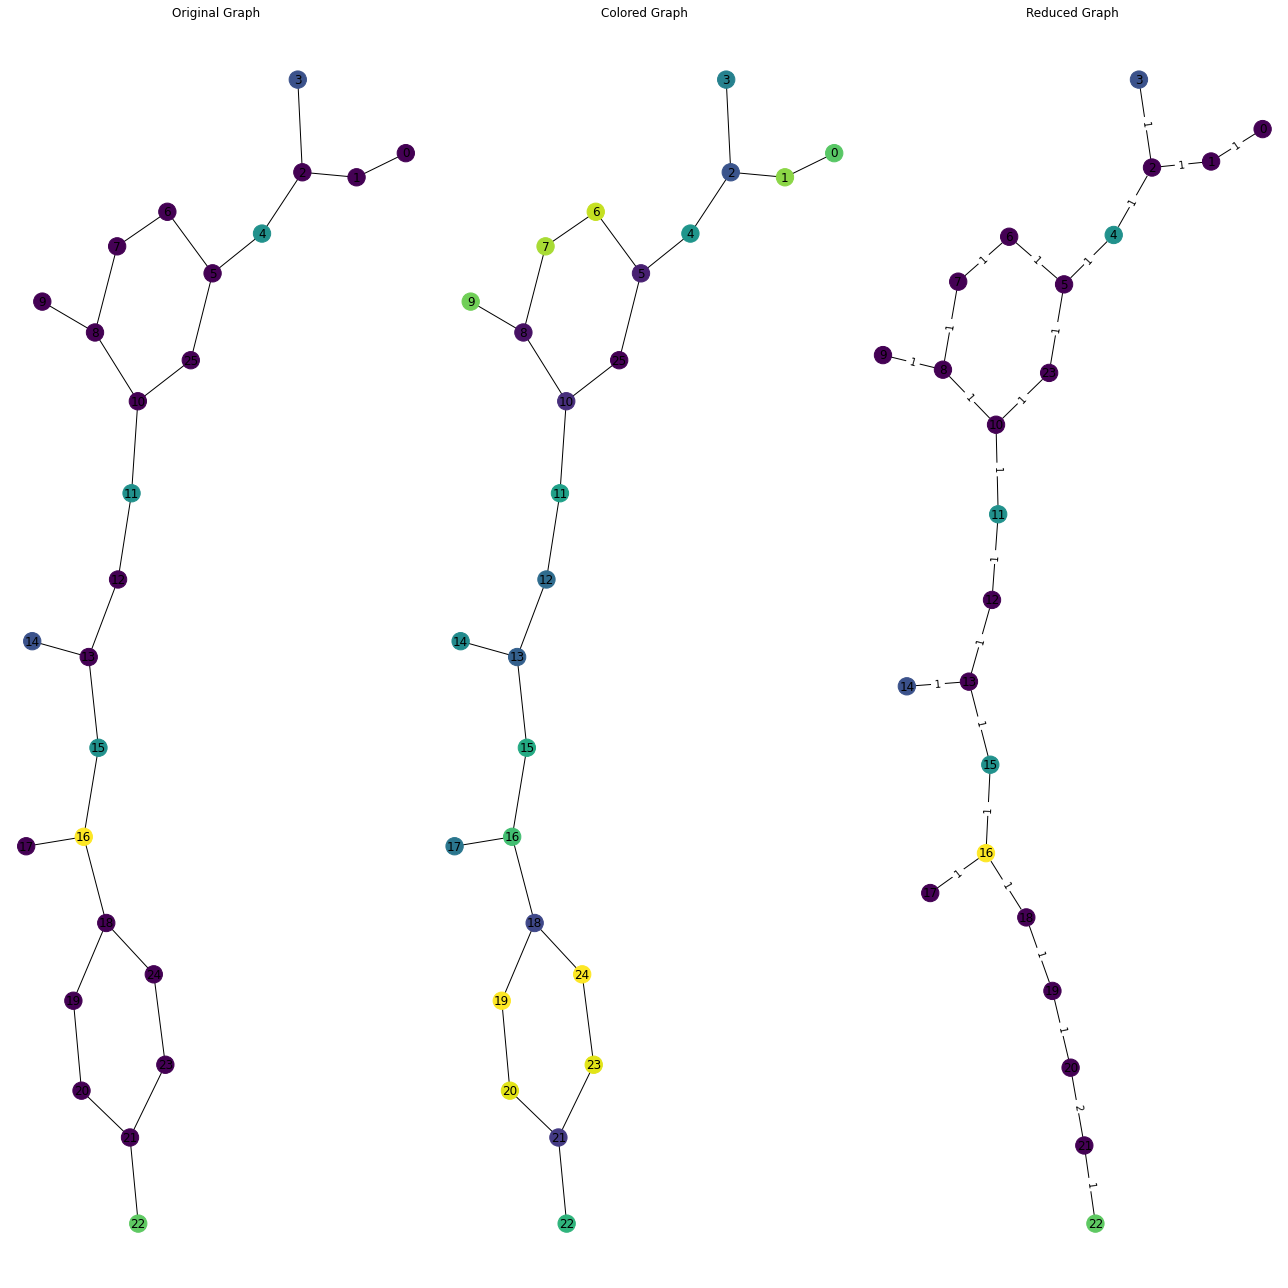

Information about C
C.nodes() =  
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25])
C.ndata[feat] =  
 tensor([223, 225, 212, 216, 218, 208, 227, 226, 207, 224, 209, 219, 214, 213,
        217, 220, 222, 215, 211, 229, 228, 210, 221, 228, 229, 206],
       dtype=torch.int32)
C.edges() =  
 (tensor([ 0,  1,  1,  2,  2,  2,  3,  4,  4,  5,  5,  5,  6,  6,  7,  7,  8,  8,
         8,  9, 10, 10, 10, 11, 11, 12, 12, 13, 13, 13, 14, 15, 15, 16, 16, 16,
        17, 18, 18, 18, 19, 19, 20, 20, 21, 21, 21, 22, 23, 23, 24, 24, 25, 25]), tensor([ 1,  0,  2,  1,  3,  4,  2,  2,  5,  4,  6, 25,  5,  7,  6,  8,  7,  9,
        10,  8,  8, 11, 25, 10, 12, 11, 13, 12, 14, 15, 13, 13, 16, 15, 17, 18,
        16, 16, 19, 24, 18, 20, 19, 21, 20, 22, 23, 21, 21, 24, 18, 23,  5, 10]))
C.edata() =  
 {'feat': tensor([1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1,
        1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1

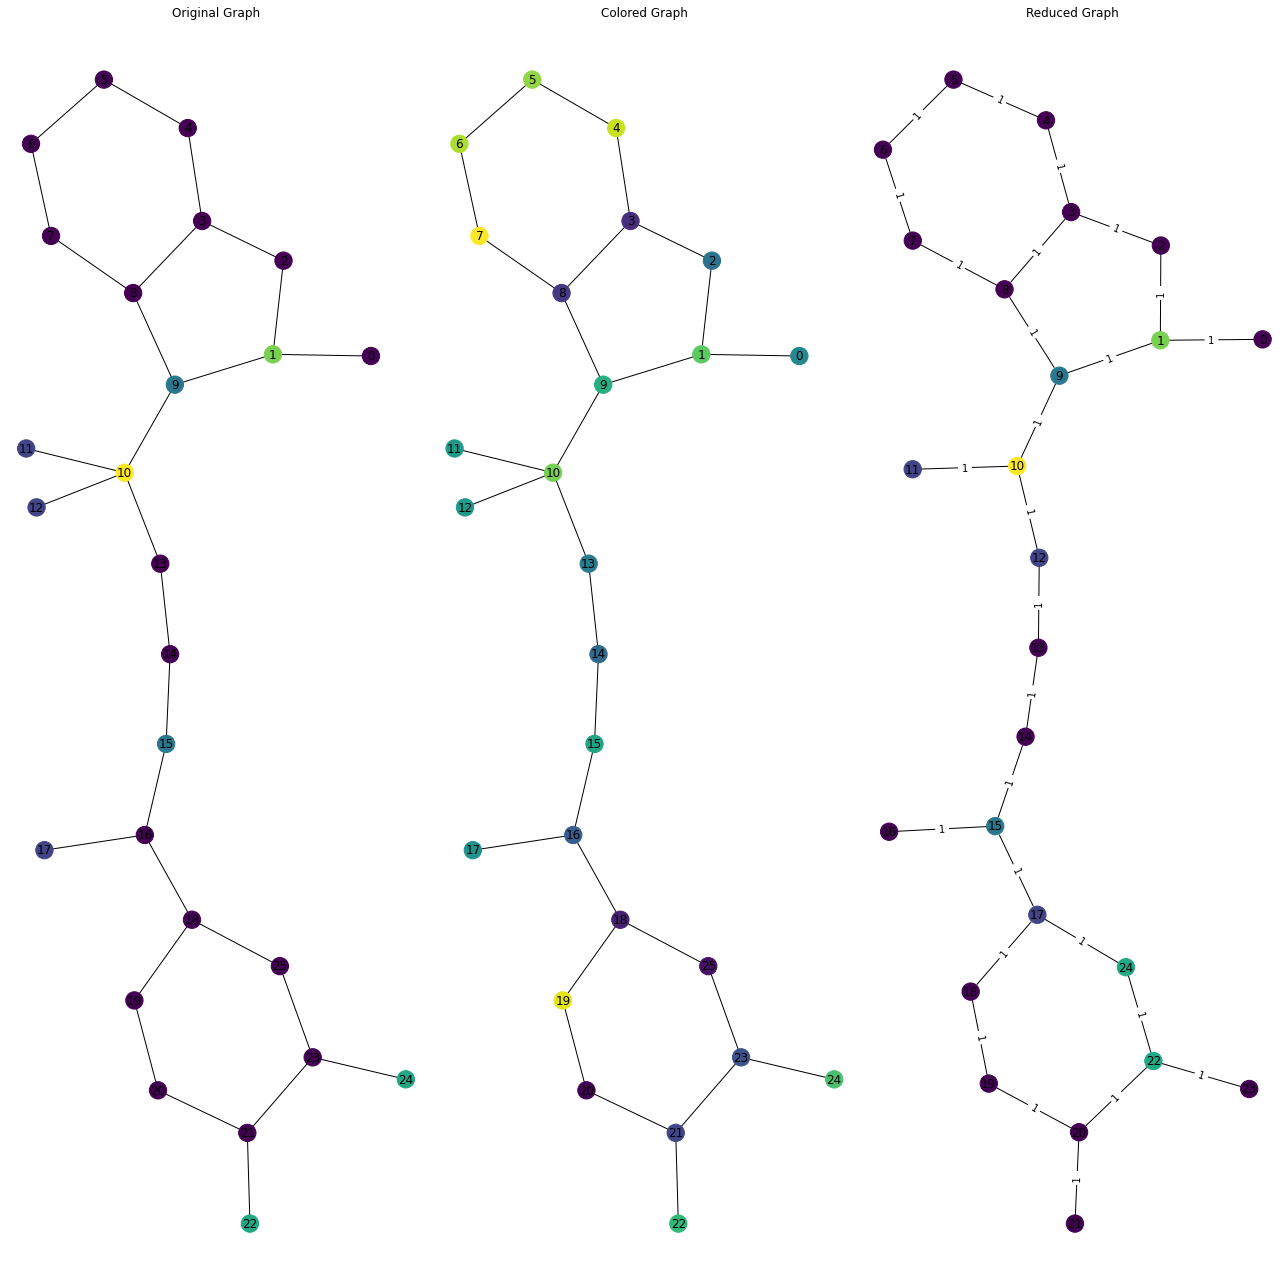

Information about C
C.nodes() =  
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25])
C.ndata[feat] =  
 tensor([223, 230, 221, 215, 234, 232, 233, 236, 216, 227, 231, 225, 225, 222,
        220, 226, 219, 224, 214, 235, 212, 217, 228, 218, 229, 213],
       dtype=torch.int32)
C.edges() =  
 (tensor([ 0,  1,  1,  1,  2,  2,  3,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,
         8,  8,  9,  9,  9, 10, 10, 10, 10, 11, 12, 13, 13, 14, 14, 15, 15, 16,
        16, 16, 17, 18, 18, 18, 19, 19, 20, 20, 21, 21, 21, 22, 23, 23, 23, 24,
        25, 25]), tensor([ 1,  0,  2,  9,  1,  3,  2,  4,  8,  3,  5,  4,  6,  5,  7,  6,  8,  3,
         7,  9,  1,  8, 10,  9, 11, 12, 13, 10, 10, 10, 14, 13, 15, 14, 16, 15,
        17, 18, 16, 16, 19, 25, 18, 20, 19, 21, 20, 22, 23, 21, 21, 24, 25, 23,
        18, 23]))
C.edata() =  
 {'feat': tensor([1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
        2, 2, 1,

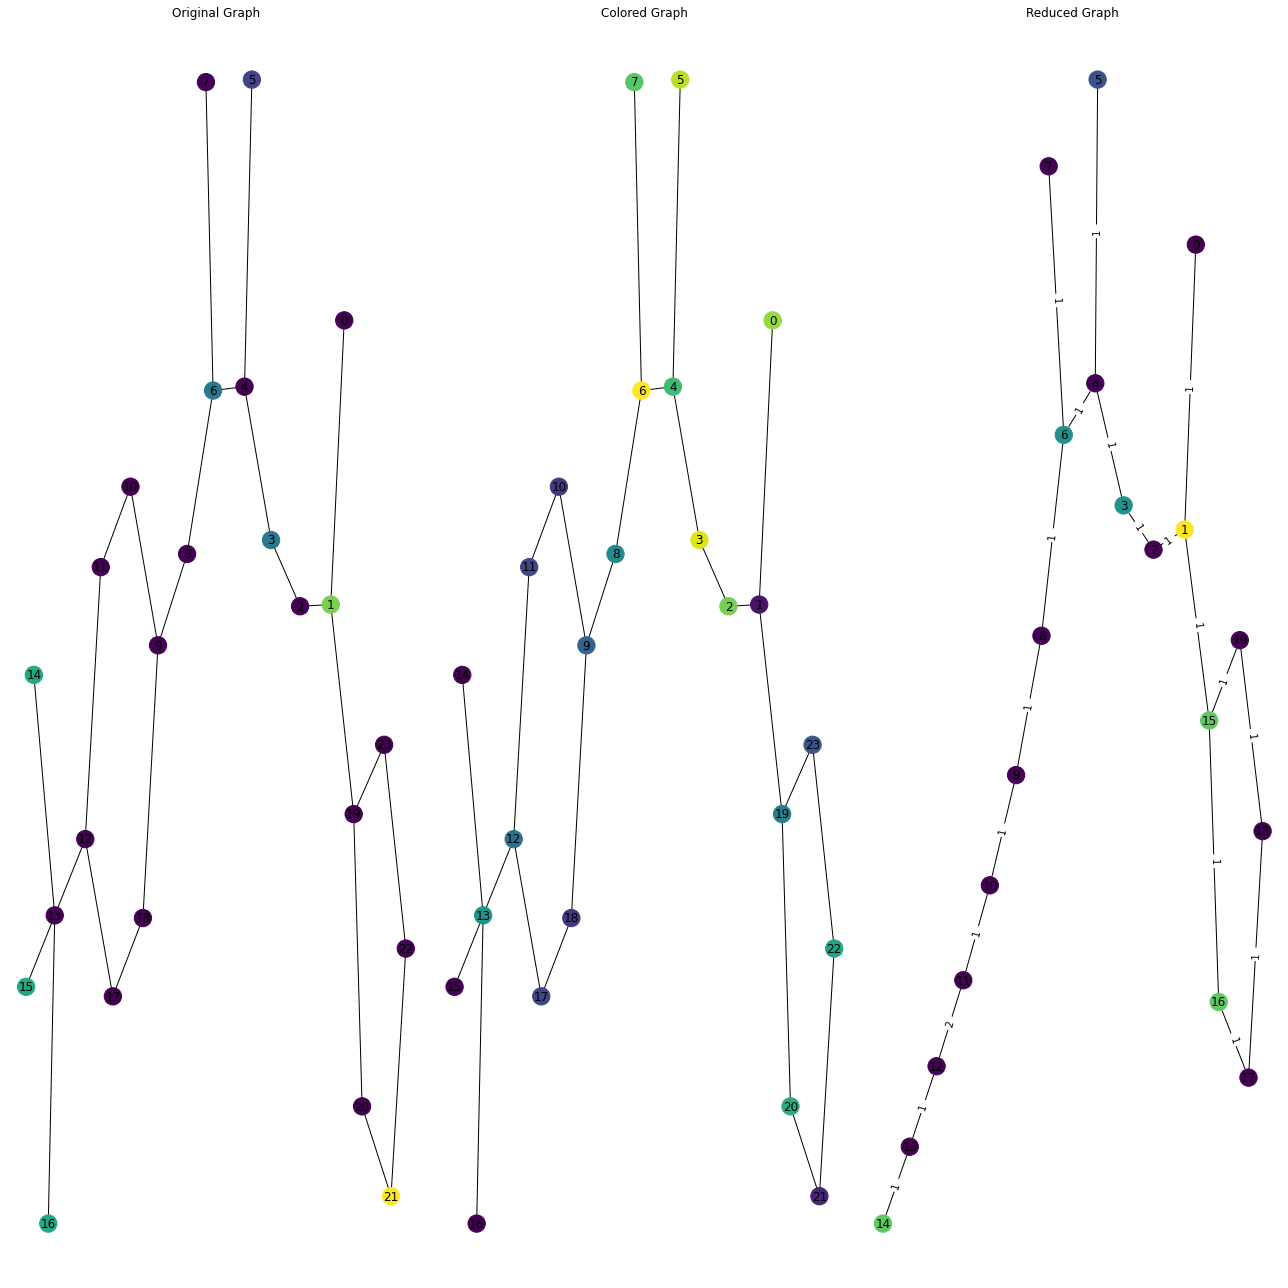

Information about C
C.nodes() =  
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23])
C.ndata[feat] =  
 tensor([192, 177, 191, 194, 189, 193, 195, 190, 185, 182, 179, 180, 183, 186,
        176, 176, 176, 180, 179, 184, 188, 178, 187, 181], dtype=torch.int32)
C.edges() =  
 (tensor([ 0,  1,  1,  1,  2,  2,  3,  3,  4,  4,  4,  5,  6,  6,  6,  7,  8,  8,
         9,  9,  9, 10, 10, 11, 11, 12, 12, 12, 13, 13, 13, 13, 14, 15, 16, 17,
        17, 18, 18, 19, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23]), tensor([ 1,  0,  2, 19,  1,  3,  2,  4,  3,  5,  6,  4,  4,  7,  8,  6,  6,  9,
         8, 10, 18,  9, 11, 10, 12, 11, 13, 17, 12, 14, 15, 16, 13, 13, 13, 12,
        18,  9, 17,  1, 20, 23, 19, 21, 20, 22, 21, 23, 19, 22]))
C.edata() =  
 {'feat': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
        2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2,
        1, 2])} 

Informa

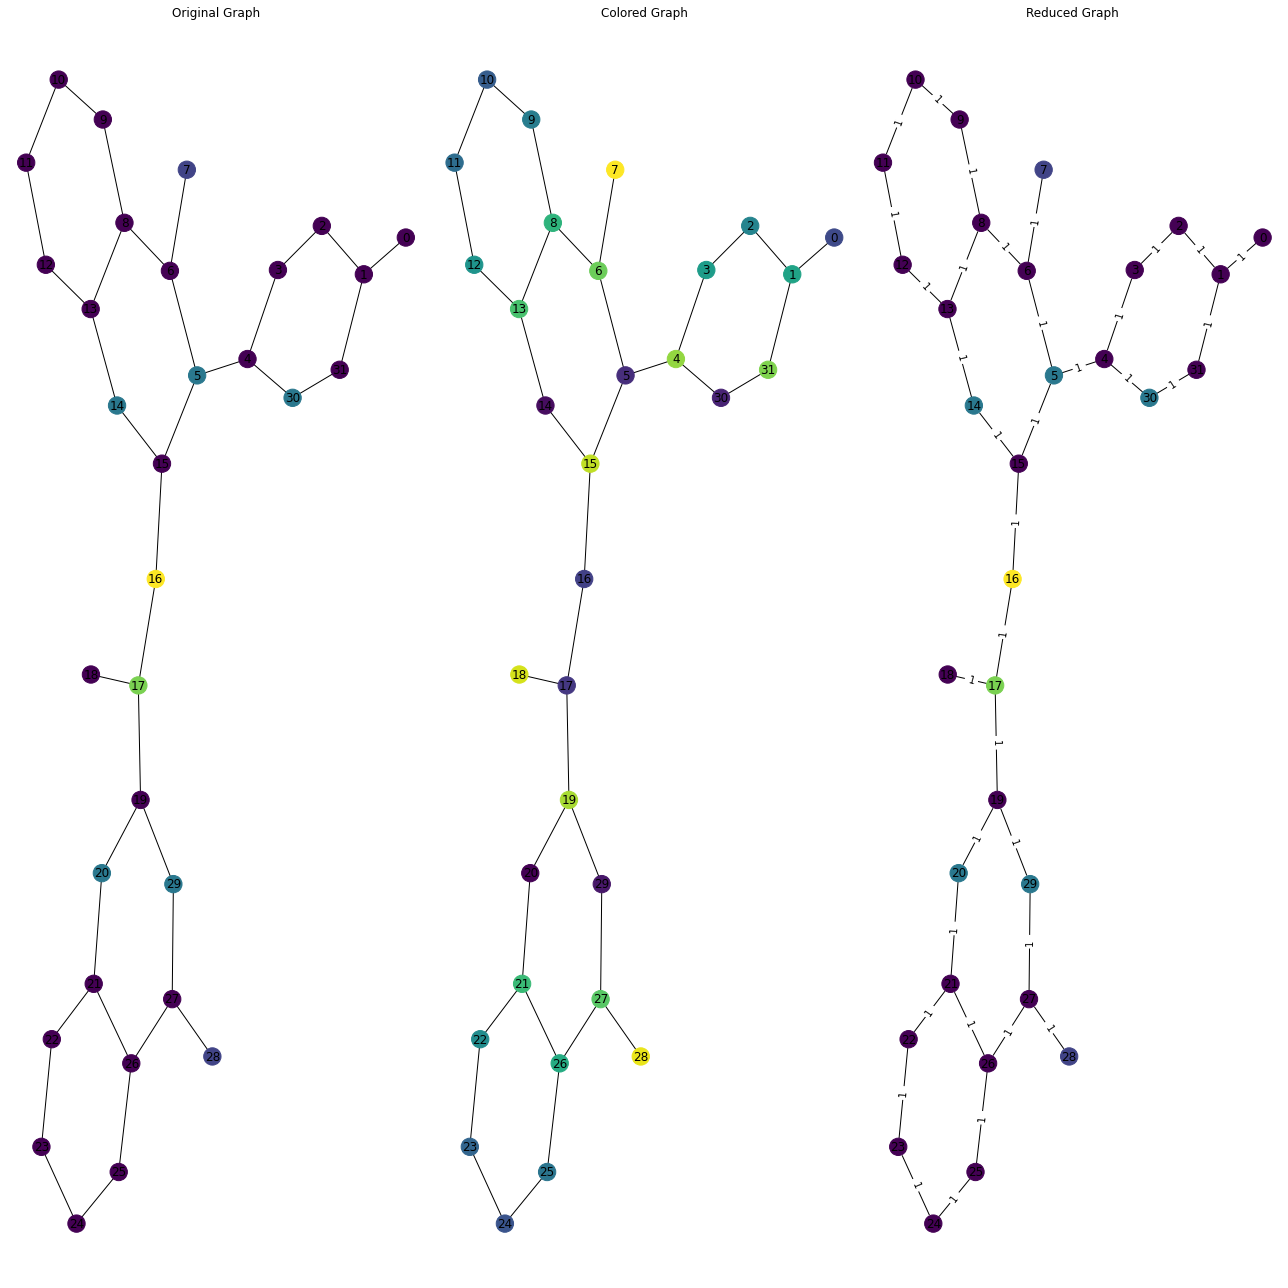

Information about C
C.nodes() =  
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])
C.ndata[feat] =  
 tensor([264, 275, 271, 274, 283, 261, 281, 288, 277, 270, 266, 268, 273, 279,
        258, 285, 263, 262, 286, 284, 257, 278, 272, 267, 265, 269, 276, 280,
        287, 259, 260, 282], dtype=torch.int32)
C.edges() =  
 (tensor([ 0,  1,  1,  1,  2,  2,  3,  3,  4,  4,  4,  5,  5,  5,  6,  6,  6,  7,
         8,  8,  8,  9,  9, 10, 10, 11, 11, 12, 12, 13, 13, 13, 14, 14, 15, 15,
        15, 16, 16, 17, 17, 17, 18, 19, 19, 19, 20, 20, 21, 21, 21, 22, 22, 23,
        23, 24, 24, 25, 25, 26, 26, 26, 27, 27, 27, 28, 29, 29, 30, 30, 31, 31]), tensor([ 1,  0,  2, 31,  1,  3,  2,  4,  3,  5, 30,  4,  6, 15,  5,  7,  8,  6,
         6,  9, 13,  8, 10,  9, 11, 10, 12, 11, 13,  8, 12, 14, 13, 15,  5, 14,
        16, 15, 17, 16, 18, 19, 17, 17, 20, 29, 19, 21, 20, 22, 26, 21, 23, 22,
        24, 23, 25,

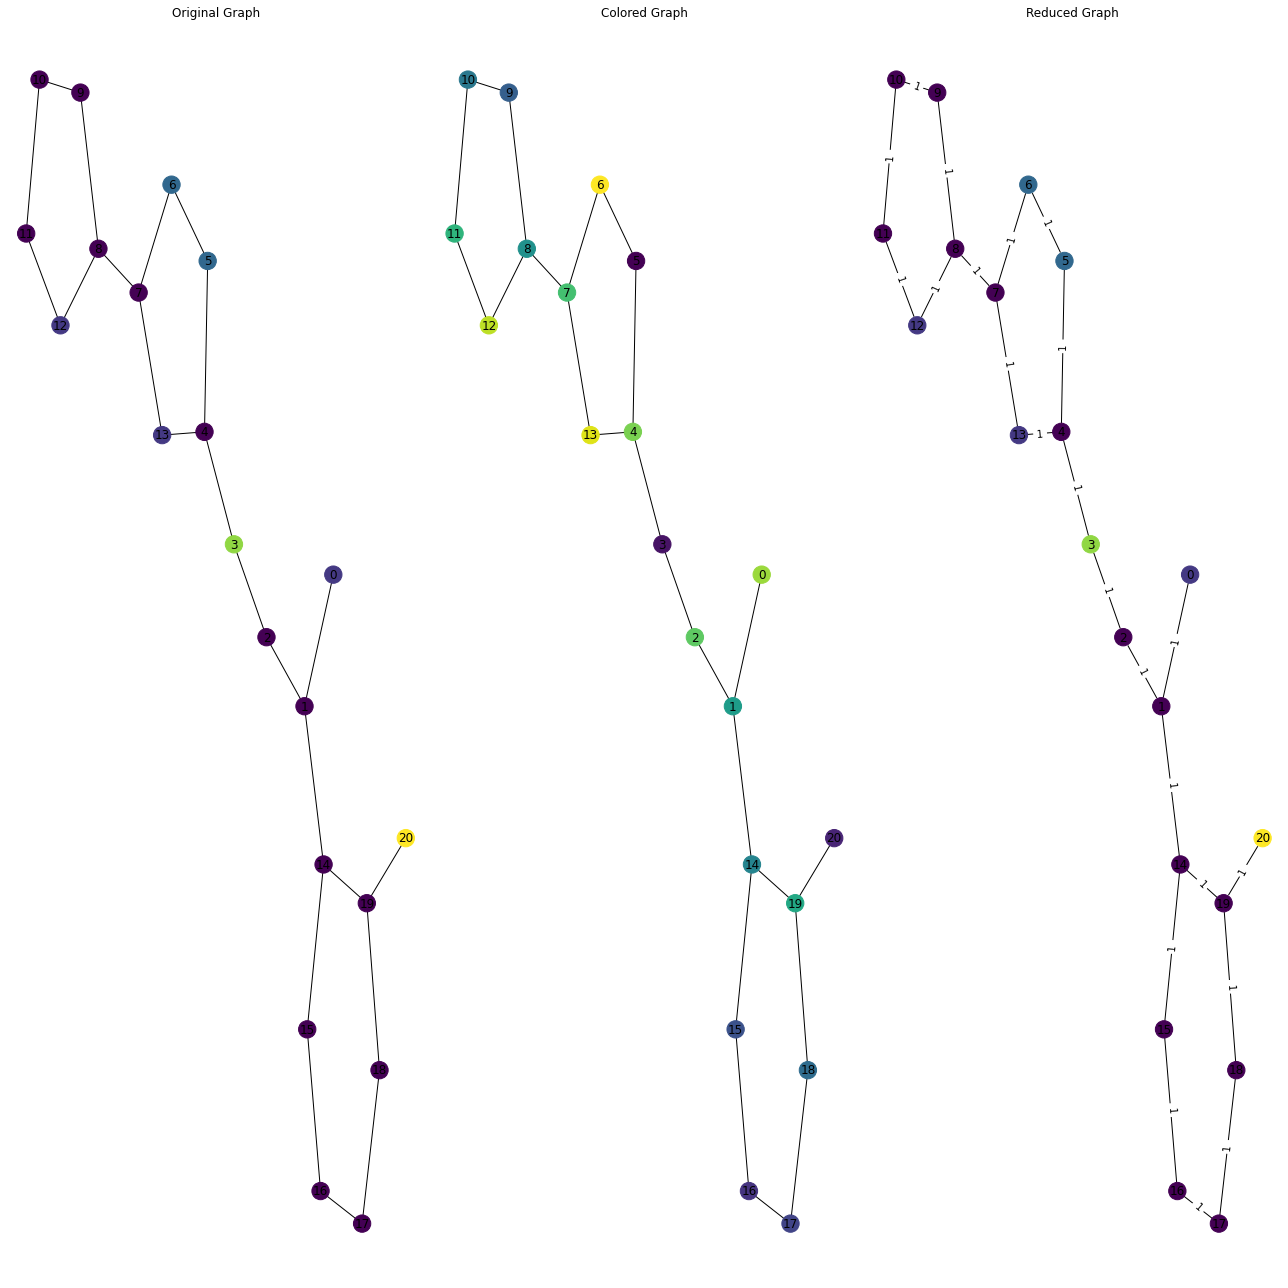

Information about C
C.nodes() =  
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20])
C.ndata[feat] =  
 tensor([198, 192, 196, 182, 197, 181, 201, 195, 191, 187, 189, 194, 199, 200,
        190, 186, 184, 185, 188, 193, 183], dtype=torch.int32)
C.edges() =  
 (tensor([ 0,  1,  1,  1,  2,  2,  3,  3,  4,  4,  4,  5,  5,  6,  6,  7,  7,  7,
         8,  8,  8,  9,  9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 14, 15, 15,
        16, 16, 17, 17, 18, 18, 19, 19, 19, 20]), tensor([ 1,  0,  2, 14,  1,  3,  2,  4,  3,  5, 13,  4,  6,  5,  7,  6,  8, 13,
         7,  9, 12,  8, 10,  9, 11, 10, 12,  8, 11,  4,  7,  1, 15, 19, 14, 16,
        15, 17, 16, 18, 17, 19, 14, 18, 20, 19]))
C.edata() =  
 {'feat': tensor([2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1,
        2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1])} 

Information about F
F.nodes() =  
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,

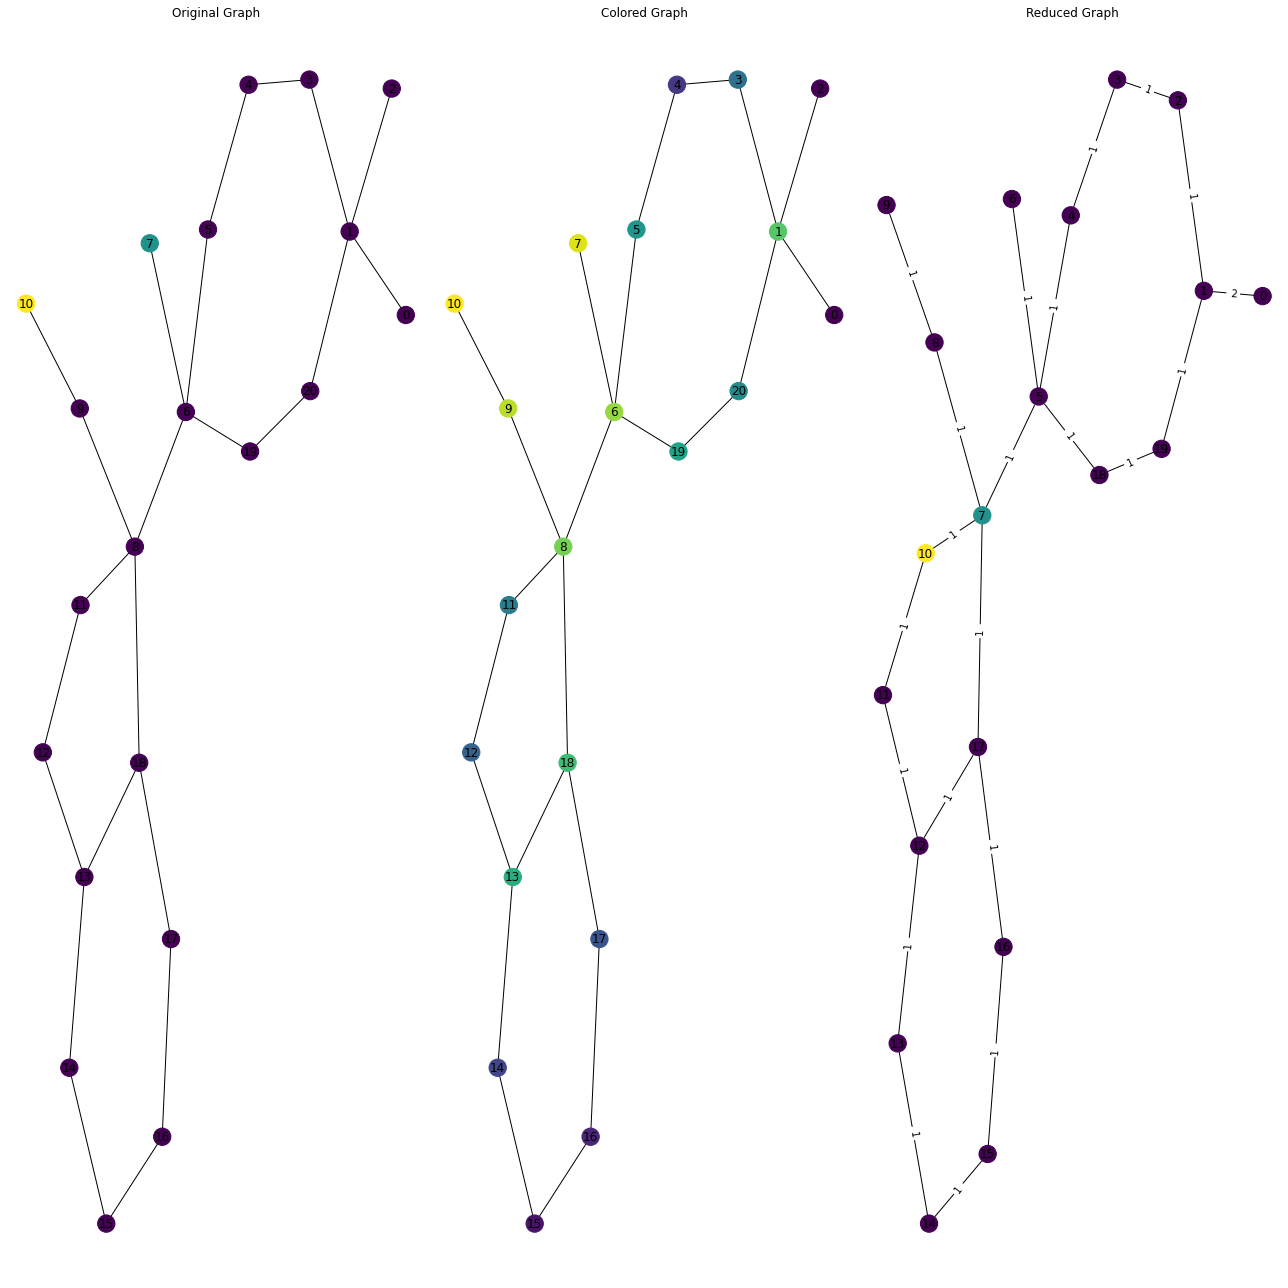

Information about C
C.nodes() =  
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20])
C.ndata[feat] =  
 tensor([161, 175, 161, 168, 164, 171, 177, 179, 176, 178, 180, 169, 167, 173,
        165, 162, 163, 166, 174, 172, 170], dtype=torch.int32)
C.edges() =  
 (tensor([ 0,  1,  1,  1,  1,  2,  3,  3,  4,  4,  5,  5,  6,  6,  6,  6,  7,  8,
         8,  8,  8,  9,  9, 10, 11, 11, 12, 12, 13, 13, 13, 14, 14, 15, 15, 16,
        16, 17, 17, 18, 18, 18, 19, 19, 20, 20]), tensor([ 1,  0,  2,  3, 20,  1,  1,  4,  3,  5,  4,  6,  5,  7,  8, 19,  6,  6,
         9, 11, 18,  8, 10,  9,  8, 12, 11, 13, 12, 14, 18, 13, 15, 14, 16, 15,
        17, 16, 18,  8, 13, 17,  6, 20,  1, 19]))
C.edata() =  
 {'feat': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3,
        1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1])} 

Information about F
F.nodes() =  
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,

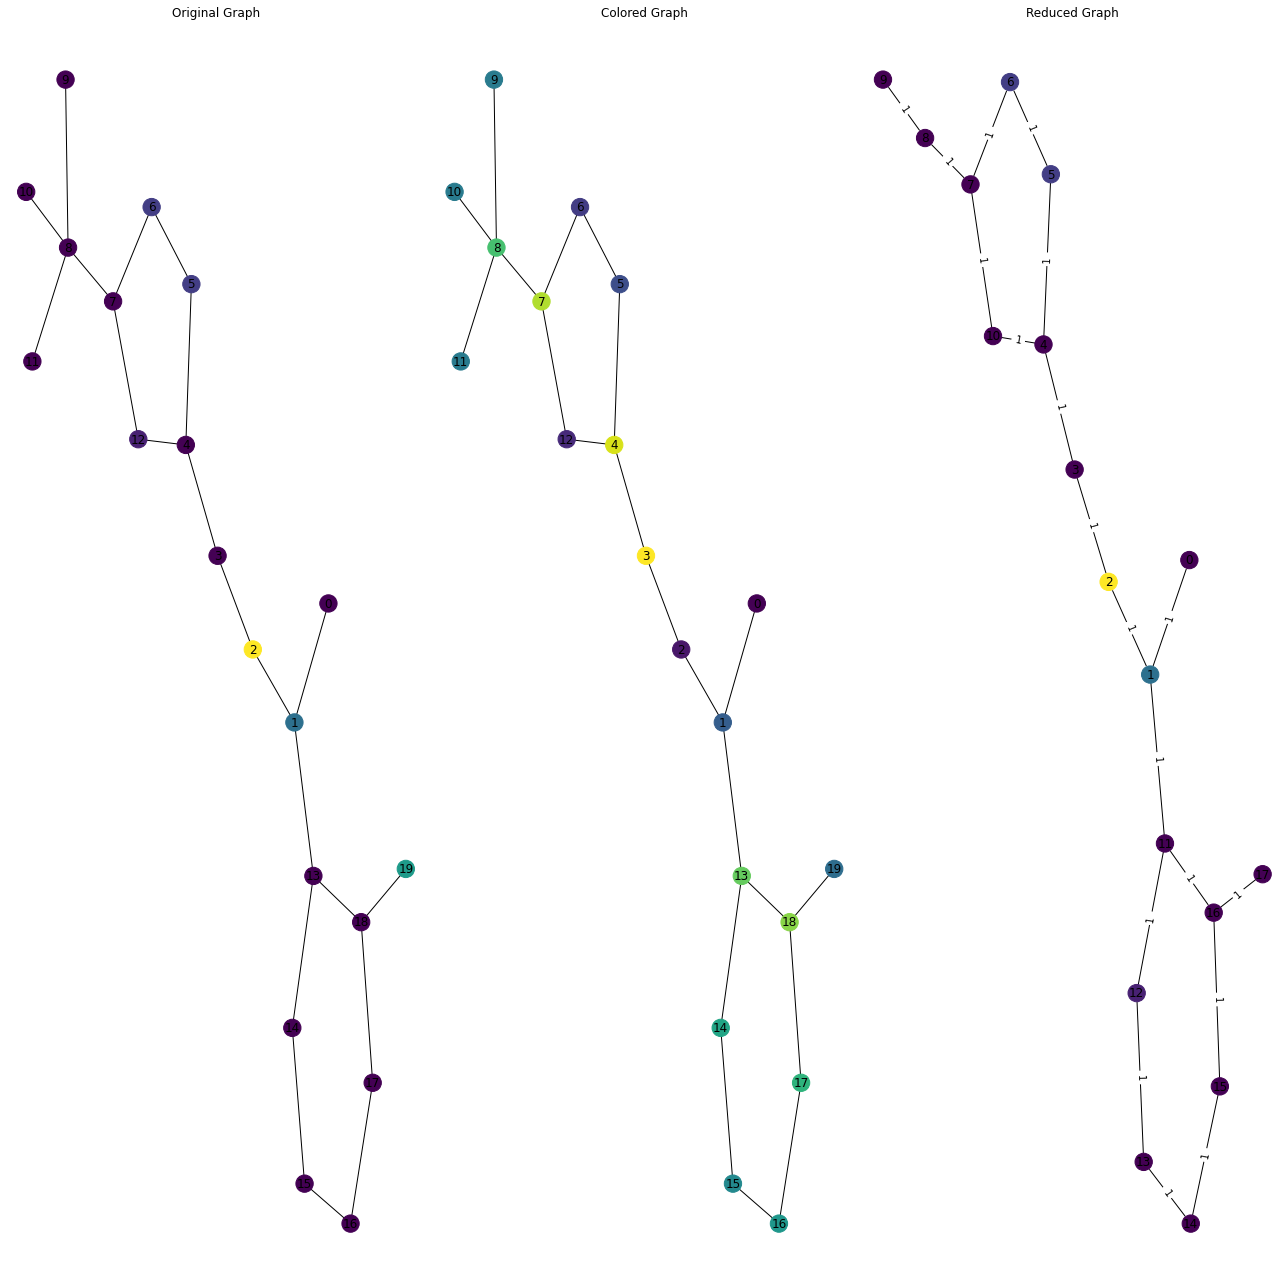

Information about C
C.nodes() =  
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19])
C.ndata[feat] =  
 tensor([156, 161, 157, 173, 172, 160, 159, 171, 168, 163, 163, 163, 158, 169,
        166, 164, 165, 167, 170, 162], dtype=torch.int32)
C.edges() =  
 (tensor([ 0,  1,  1,  1,  2,  2,  3,  3,  4,  4,  4,  5,  5,  6,  6,  7,  7,  7,
         8,  8,  8,  8,  9, 10, 11, 12, 12, 13, 13, 13, 14, 14, 15, 15, 16, 16,
        17, 17, 18, 18, 18, 19]), tensor([ 1,  0,  2, 13,  1,  3,  2,  4,  3,  5, 12,  4,  6,  5,  7,  6,  8, 12,
         7,  9, 10, 11,  8,  8,  8,  4,  7,  1, 14, 18, 13, 15, 14, 16, 15, 17,
        16, 18, 13, 17, 19, 18]))
C.edata() =  
 {'feat': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1])} 

Information about F
F.nodes() =  
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])
F.ndata[feat] =  
 tens

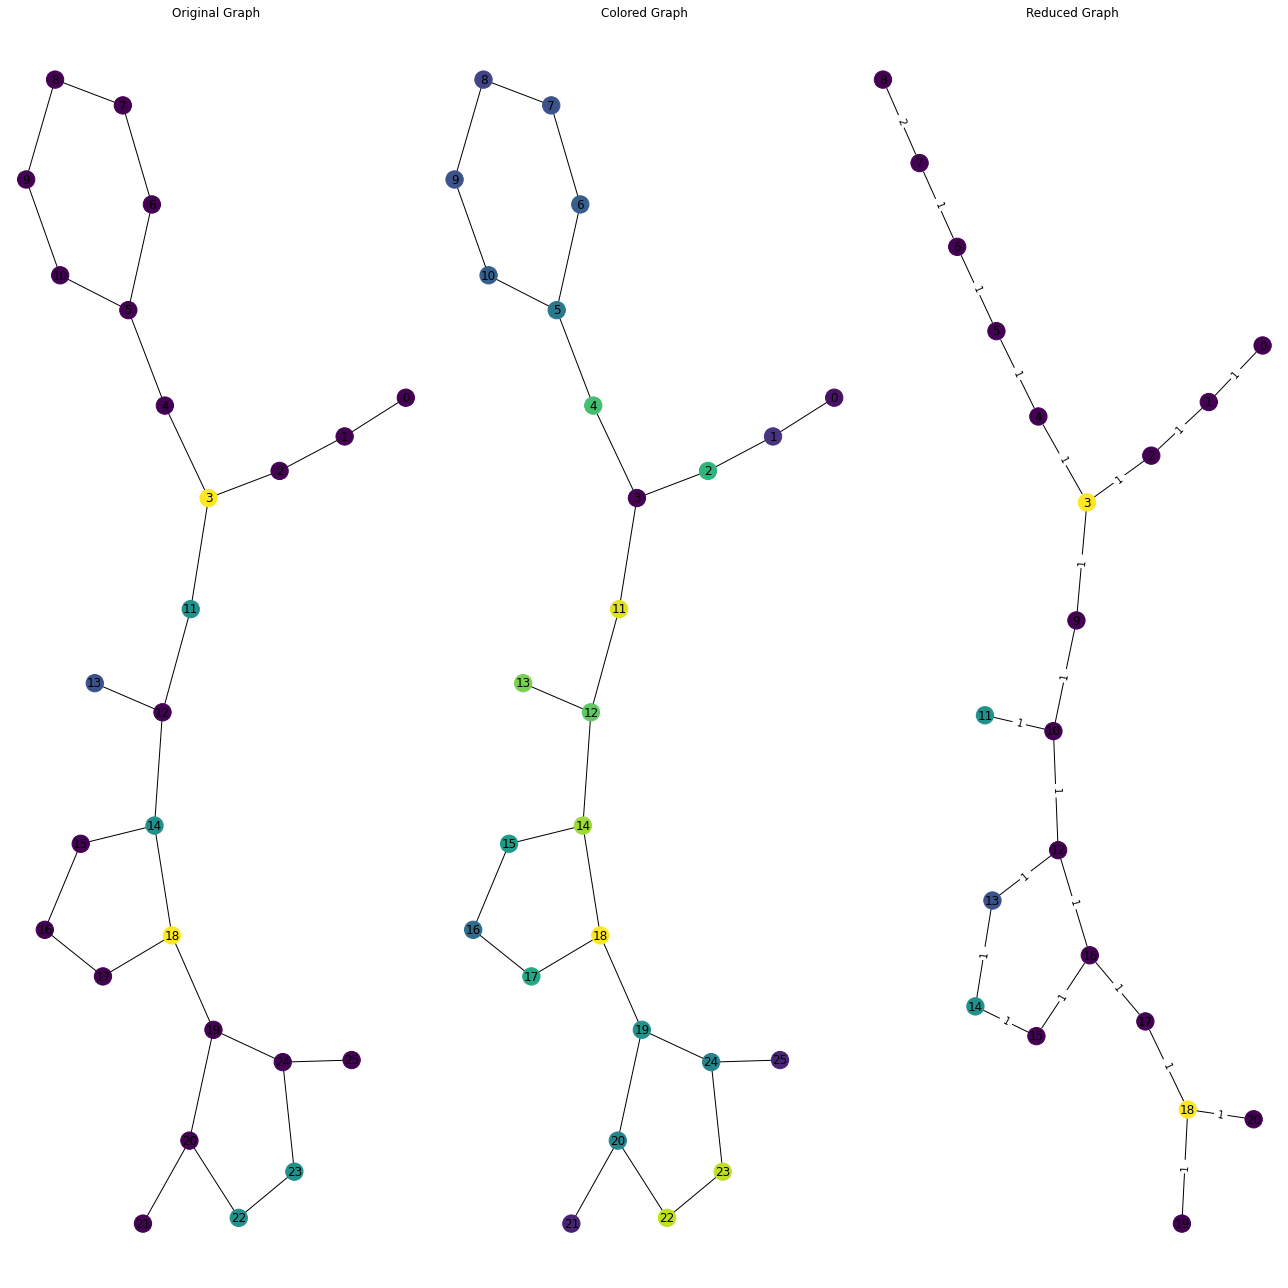

Information about C
C.nodes() =  
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25])
C.ndata[feat] =  
 tensor([181, 183, 193, 180, 194, 188, 186, 185, 184, 185, 186, 199, 195, 196,
        197, 191, 187, 192, 200, 190, 189, 182, 198, 198, 189, 182],
       dtype=torch.int32)
C.edges() =  
 (tensor([ 0,  1,  1,  2,  2,  3,  3,  3,  4,  4,  5,  5,  5,  6,  6,  7,  7,  8,
         8,  9,  9, 10, 10, 11, 11, 12, 12, 12, 13, 14, 14, 14, 15, 15, 16, 16,
        17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 22, 22, 23, 23, 24, 24,
        24, 25]), tensor([ 1,  0,  2,  1,  3,  2,  4, 11,  3,  5,  4,  6, 10,  5,  7,  6,  8,  7,
         9,  8, 10,  5,  9,  3, 12, 11, 13, 14, 12, 12, 15, 18, 14, 16, 15, 17,
        16, 18, 14, 17, 19, 18, 20, 24, 19, 21, 22, 20, 20, 23, 22, 24, 19, 23,
        25, 24]))
C.edata() =  
 {'feat': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1,
        1, 1, 2,

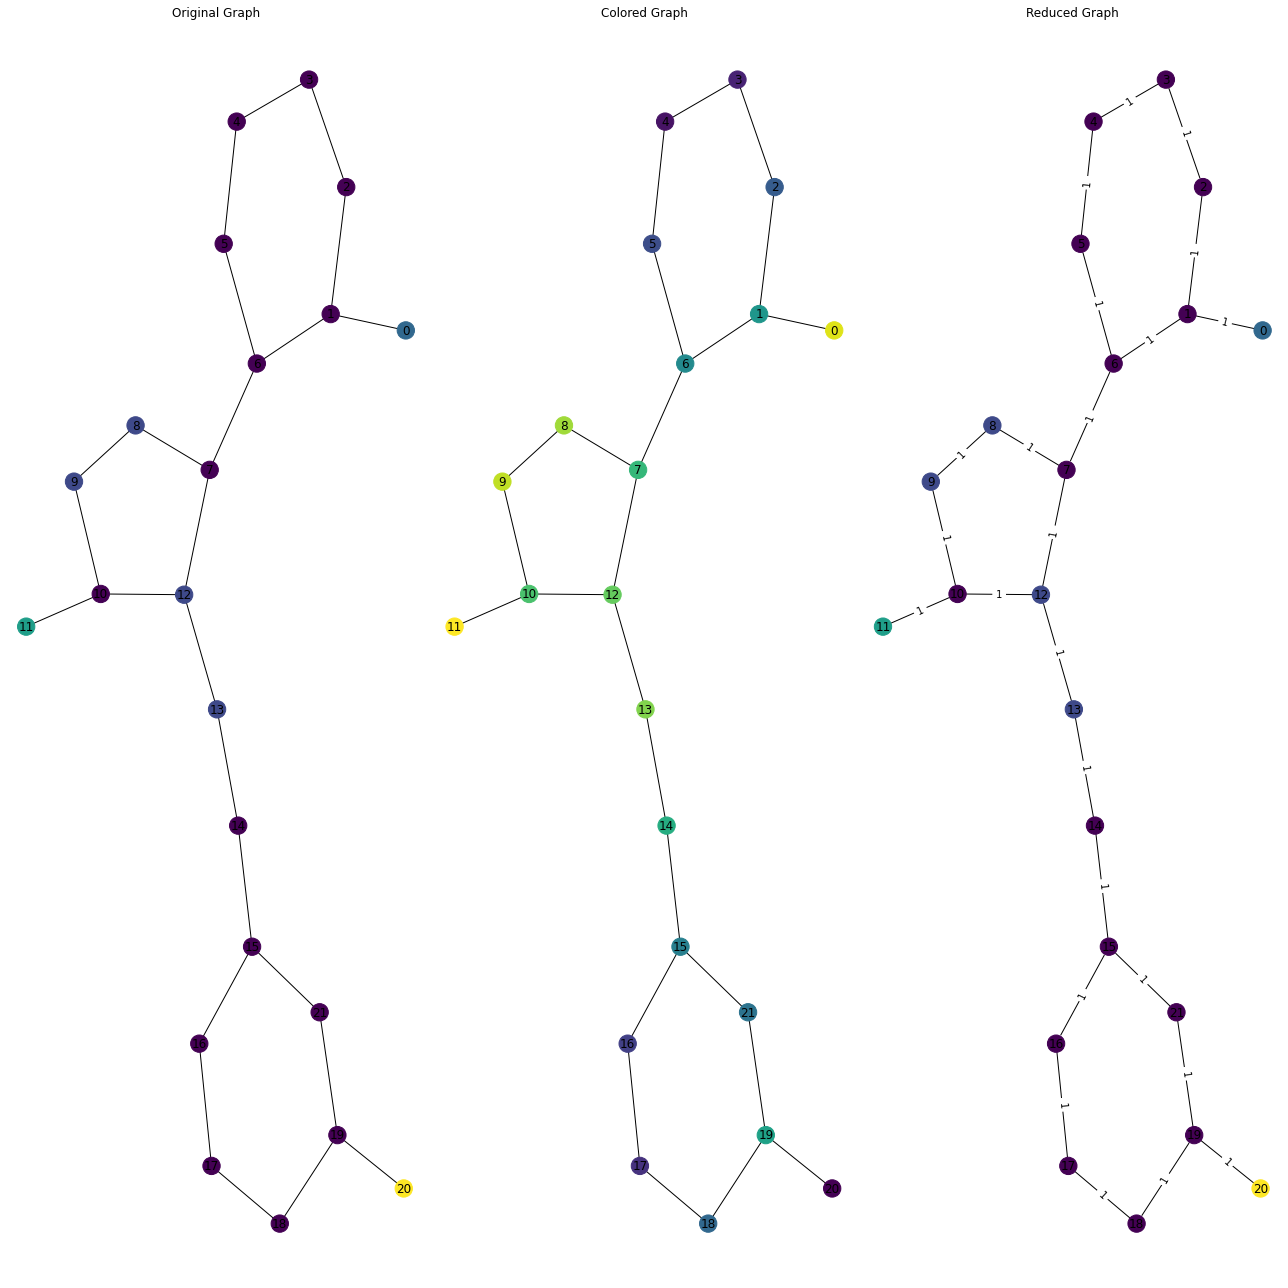

Information about C
C.nodes() =  
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21])
C.ndata[feat] =  
 tensor([206, 197, 192, 188, 187, 191, 196, 200, 204, 205, 201, 207, 202, 203,
        199, 195, 190, 189, 193, 198, 186, 194], dtype=torch.int32)
C.edges() =  
 (tensor([ 0,  1,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  6,  7,  7,  7,
         8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 12, 13, 13, 14, 14, 15, 15, 15,
        16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 21, 21]), tensor([ 1,  0,  2,  6,  1,  3,  2,  4,  3,  5,  4,  6,  1,  5,  7,  6,  8, 12,
         7,  9,  8, 10,  9, 11, 12, 10,  7, 10, 13, 12, 14, 13, 15, 14, 16, 21,
        15, 17, 16, 18, 17, 19, 18, 20, 21, 19, 15, 19]))
C.edata() =  
 {'feat': tensor([1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2,
        1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2])} 

Information about F
F.nodes() =  
 tensor([ 0,  1,  2, 

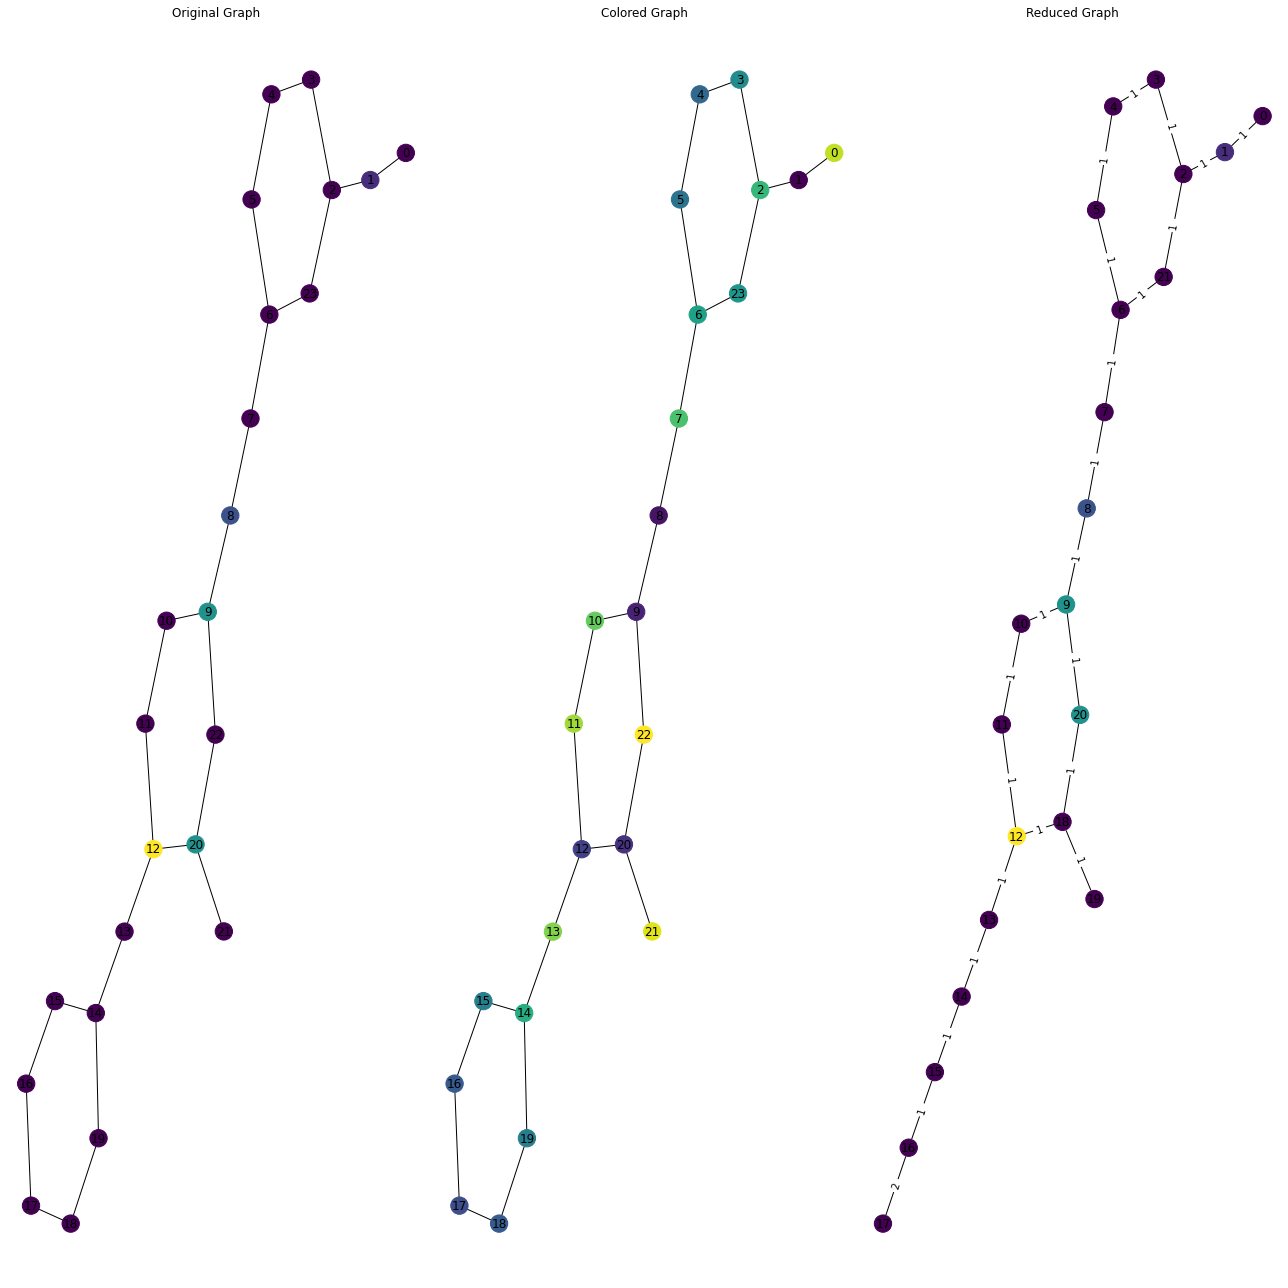

Information about C
C.nodes() =  
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23])
C.ndata[feat] =  
 tensor([207, 188, 202, 198, 195, 196, 200, 203, 189, 190, 204, 206, 192, 205,
        201, 197, 194, 193, 194, 197, 191, 208, 209, 199], dtype=torch.int32)
C.edges() =  
 (tensor([ 0,  1,  1,  2,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  6,  7,  7,  8,
         8,  9,  9,  9, 10, 10, 11, 11, 12, 12, 12, 13, 13, 14, 14, 14, 15, 15,
        16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 20, 21, 22, 22, 23, 23]), tensor([ 1,  0,  2,  1,  3, 23,  2,  4,  3,  5,  4,  6,  5,  7, 23,  6,  8,  7,
         9,  8, 10, 22,  9, 11, 10, 12, 11, 13, 20, 12, 14, 13, 15, 19, 14, 16,
        15, 17, 16, 18, 17, 19, 14, 18, 12, 21, 22, 20,  9, 20,  2,  6]))
C.edata() =  
 {'feat': tensor([1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
        1

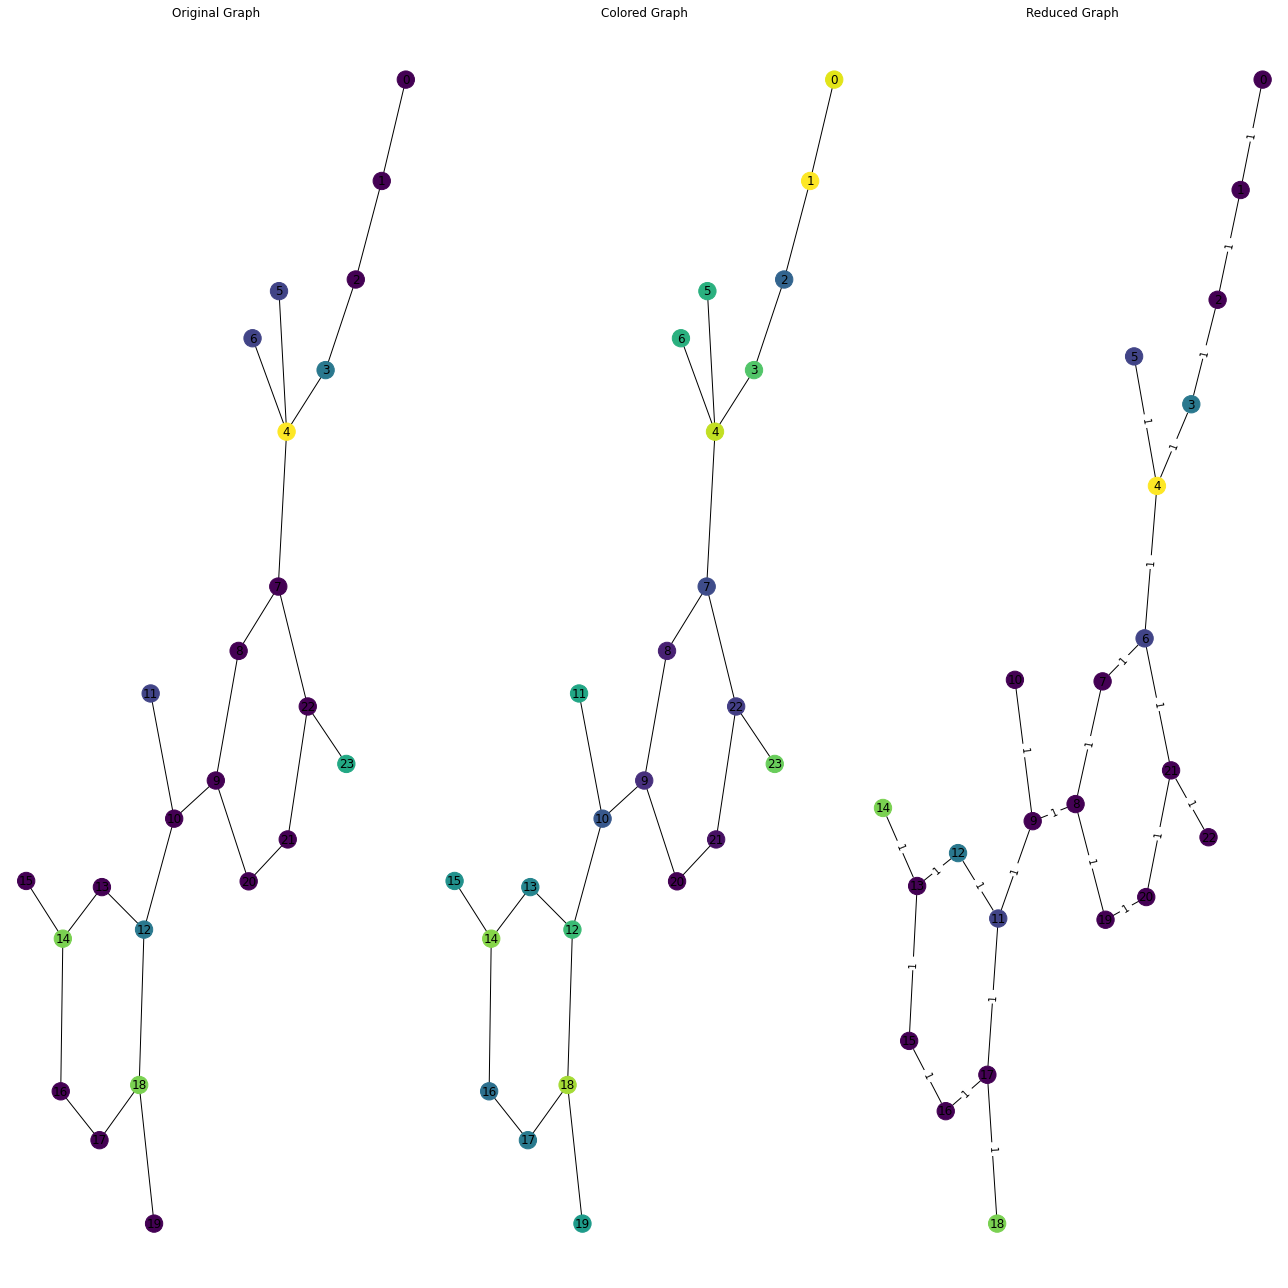

Information about C
C.nodes() =  
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23])
C.ndata[feat] =  
 tensor([224, 225, 210, 219, 223, 217, 217, 208, 205, 206, 209, 216, 218, 213,
        221, 214, 211, 212, 222, 215, 203, 204, 207, 220], dtype=torch.int32)
C.edges() =  
 (tensor([ 0,  1,  1,  2,  2,  3,  3,  4,  4,  4,  4,  5,  6,  7,  7,  7,  8,  8,
         9,  9,  9, 10, 10, 10, 11, 12, 12, 12, 13, 13, 14, 14, 14, 15, 16, 16,
        17, 17, 18, 18, 18, 19, 20, 20, 21, 21, 22, 22, 22, 23]), tensor([ 1,  0,  2,  1,  3,  2,  4,  3,  5,  6,  7,  4,  4,  4,  8, 22,  7,  9,
         8, 10, 20,  9, 11, 12, 10, 10, 13, 18, 12, 14, 13, 15, 16, 14, 14, 17,
        16, 18, 12, 17, 19, 18,  9, 21, 20, 22,  7, 21, 23, 22]))
C.edata() =  
 {'feat': tensor([2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2,
        1, 1])} 

Informa

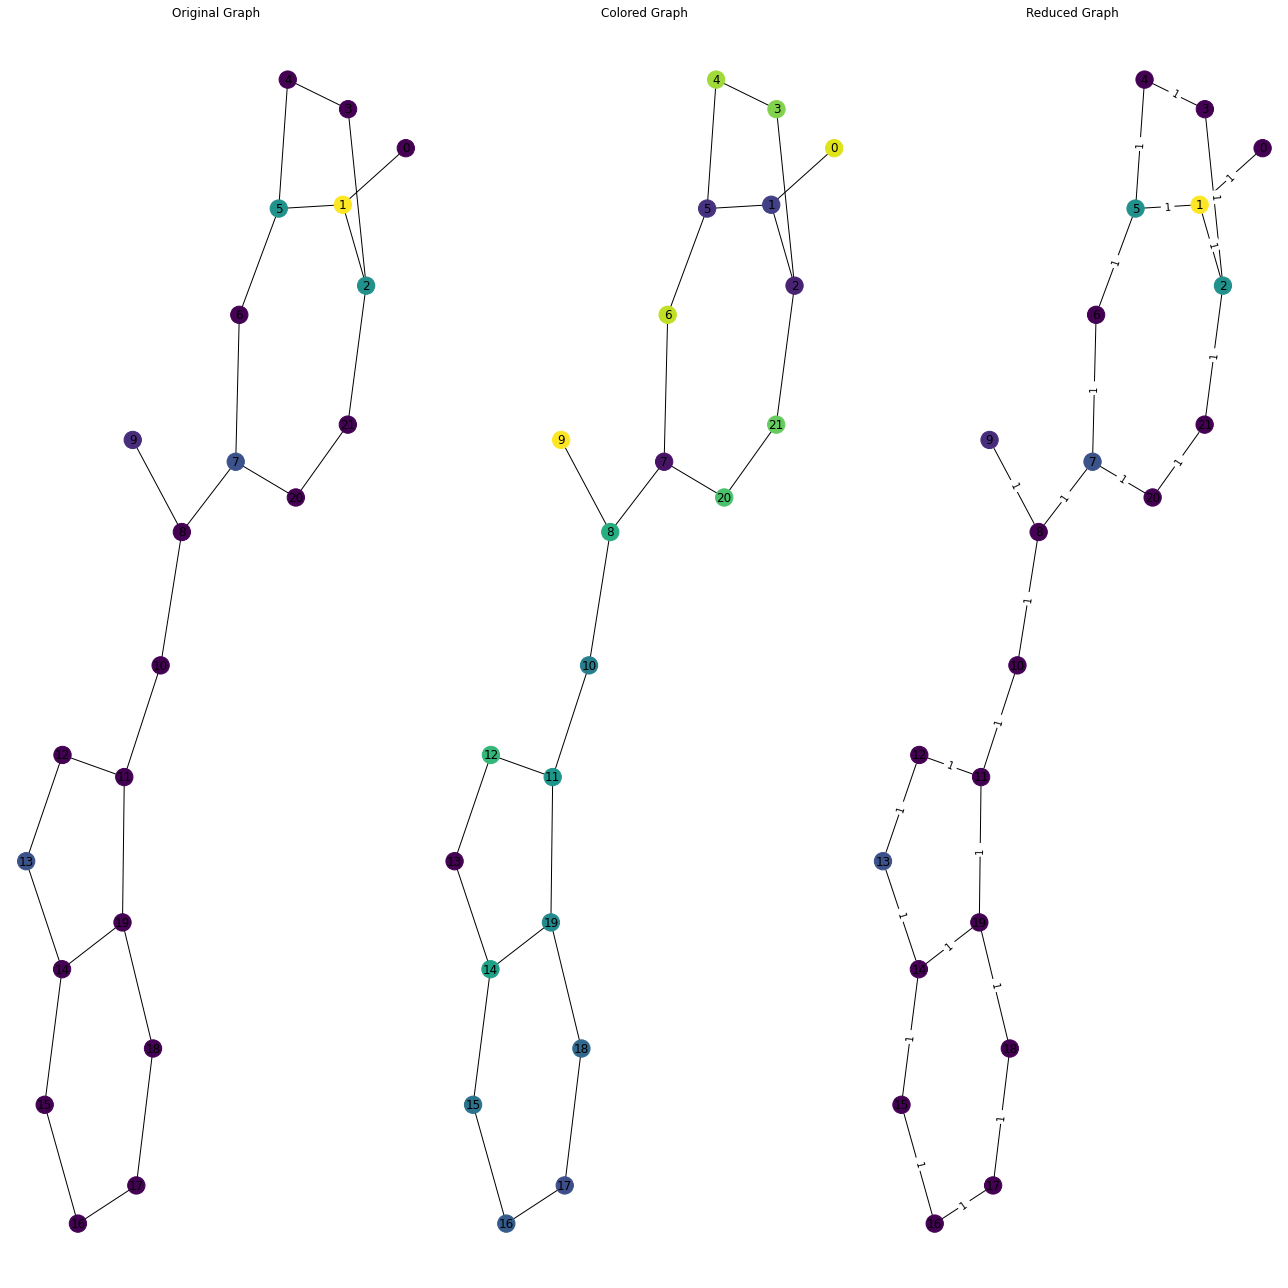

Information about C
C.nodes() =  
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21])
C.ndata[feat] =  
 tensor([208, 192, 190, 205, 206, 191, 207, 189, 201, 209, 197, 199, 202, 188,
        200, 196, 194, 193, 195, 198, 203, 204], dtype=torch.int32)
C.edges() =  
 (tensor([ 0,  1,  1,  1,  2,  2,  2,  3,  3,  4,  4,  5,  5,  5,  6,  6,  7,  7,
         7,  8,  8,  8,  9, 10, 10, 11, 11, 11, 12, 12, 13, 13, 14, 14, 14, 15,
        15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21, 21]), tensor([ 1,  0,  2,  5,  1,  3, 21,  2,  4,  3,  5,  1,  4,  6,  5,  7,  6,  8,
        20,  7,  9, 10,  8,  8, 11, 10, 12, 19, 11, 13, 12, 14, 13, 15, 19, 14,
        16, 15, 17, 16, 18, 17, 19, 11, 14, 18,  7, 21,  2, 20]))
C.edata() =  
 {'feat': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
        1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1,
        1, 1])} 

Information about F
F.nod

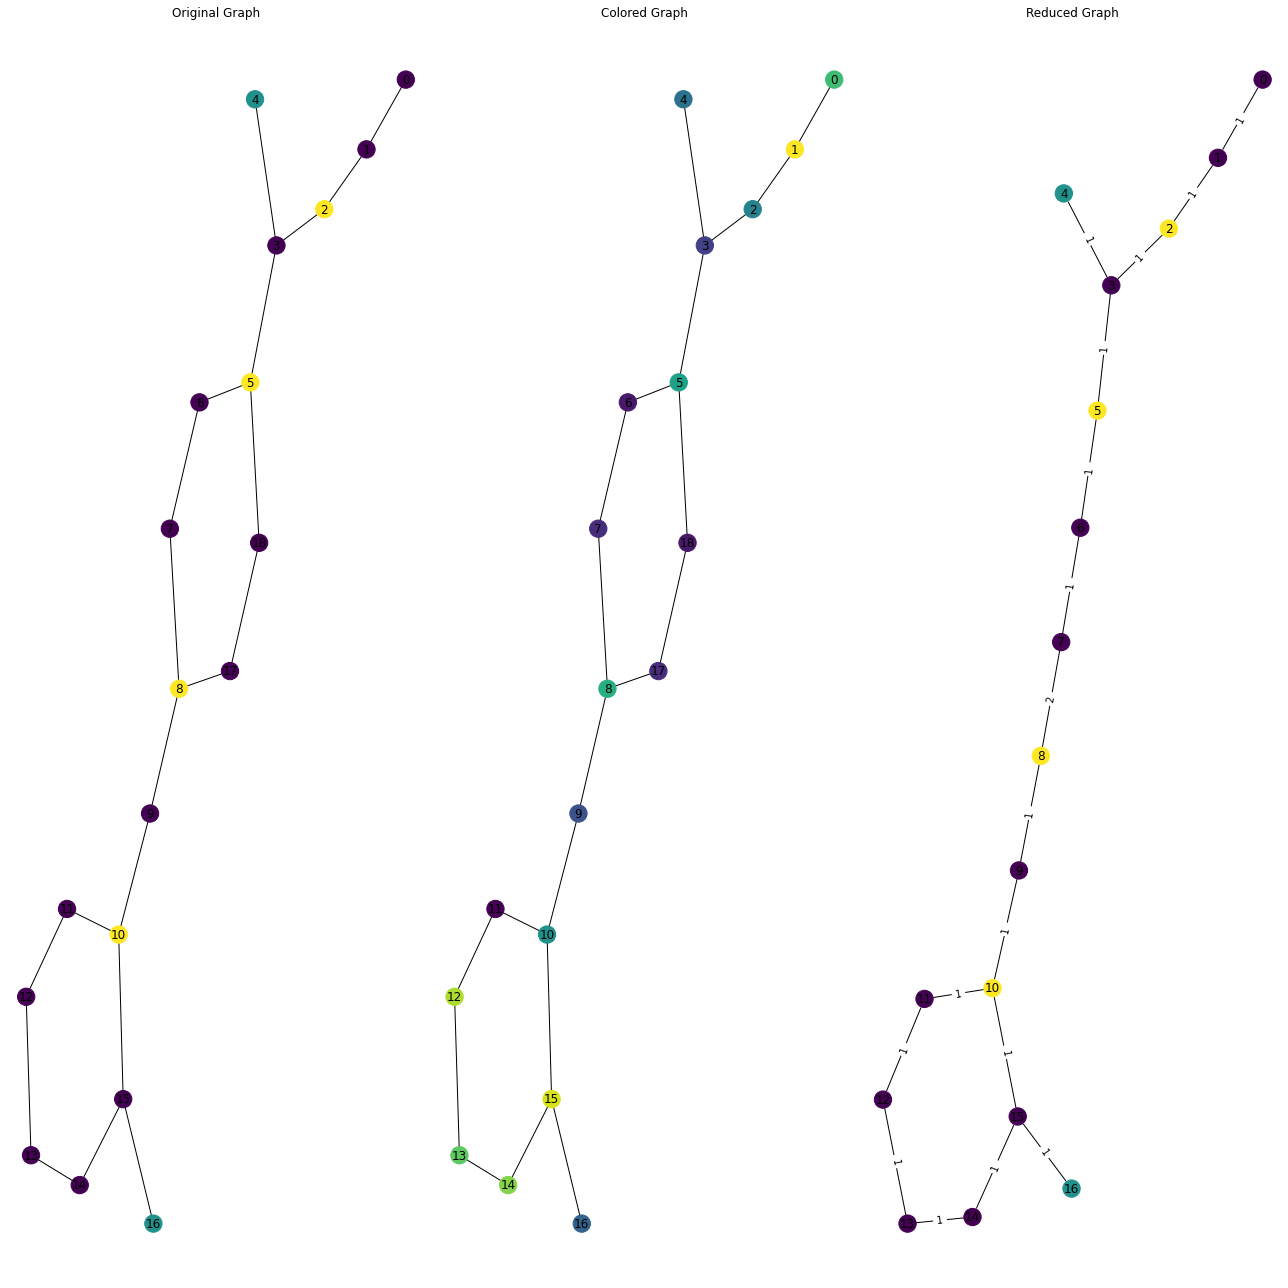

Information about C
C.nodes() =  
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18])
C.ndata[feat] =  
 tensor([156, 161, 152, 148, 151, 154, 146, 147, 155, 149, 153, 145, 159, 157,
        158, 160, 150, 147, 146], dtype=torch.int32)
C.edges() =  
 (tensor([ 0,  1,  1,  2,  2,  3,  3,  3,  4,  5,  5,  5,  6,  6,  7,  7,  8,  8,
         8,  9,  9, 10, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 15, 16,
        17, 17, 18, 18]), tensor([ 1,  0,  2,  1,  3,  2,  4,  5,  3,  3,  6, 18,  5,  7,  6,  8,  7,  9,
        17,  8, 10,  9, 11, 15, 10, 12, 11, 13, 12, 14, 13, 15, 10, 14, 16, 15,
         8, 18,  5, 17]))
C.edata() =  
 {'feat': tensor([1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1])} 

Information about F
F.nodes() =  
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])
F.ndata[feat] =  
 tensor([[0., 1.],
        [0., 1.],
   

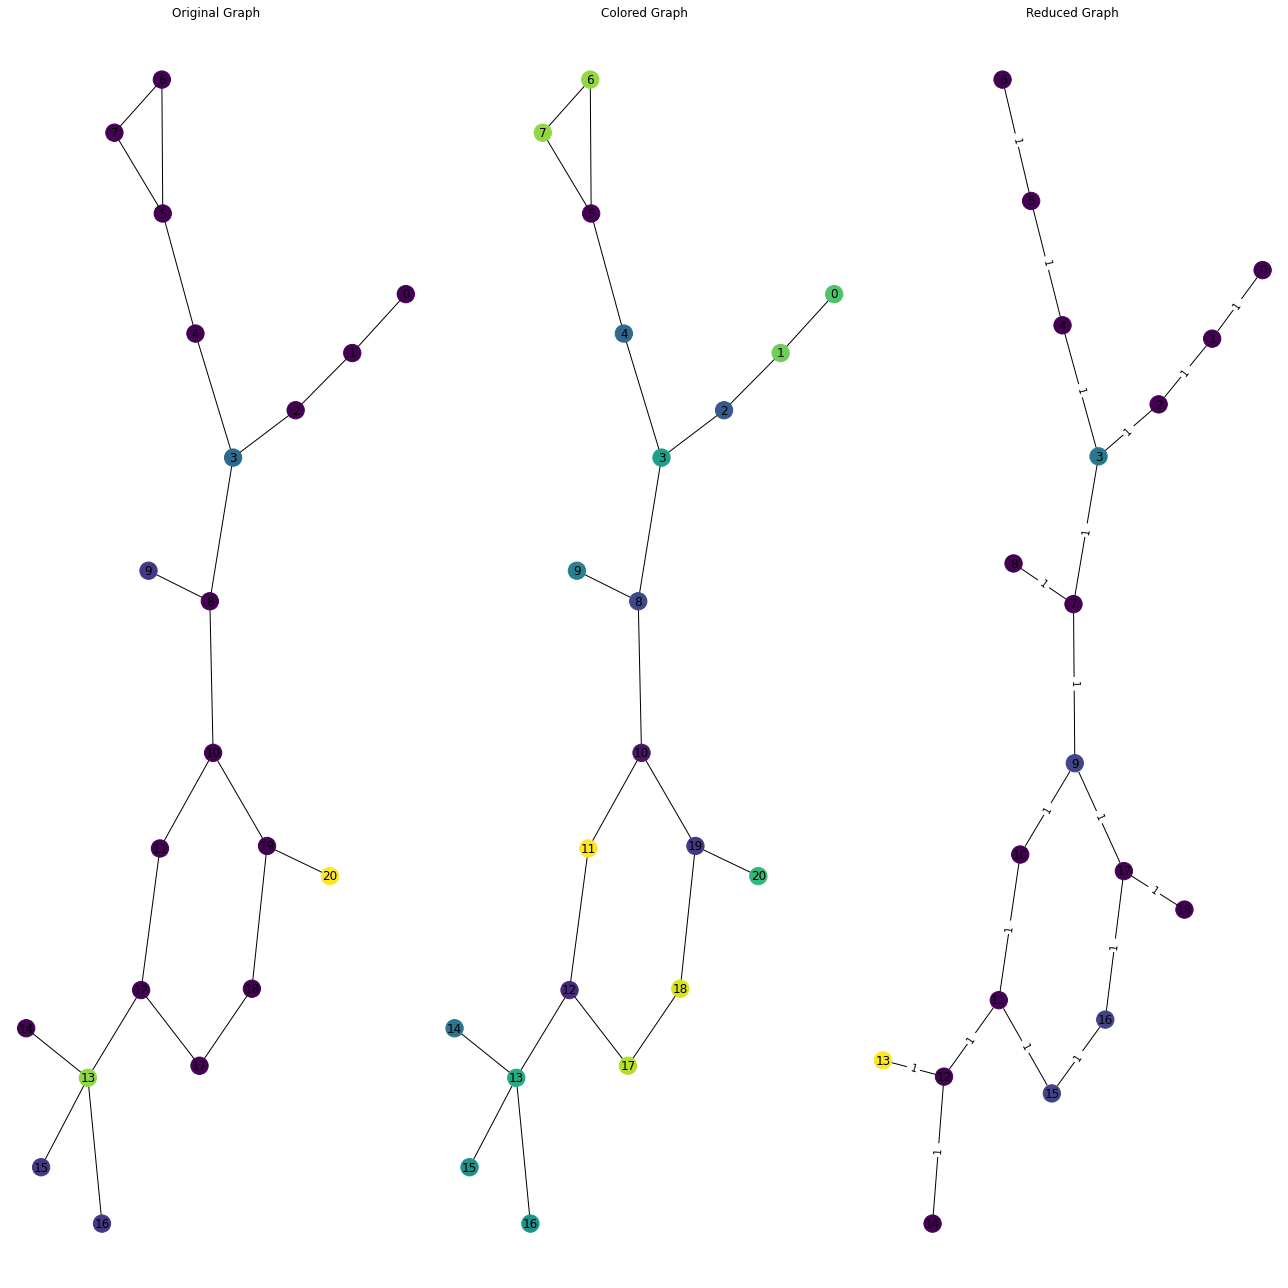

Information about C
C.nodes() =  
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20])
C.ndata[feat] =  
 tensor([179, 180, 171, 176, 172, 166, 181, 181, 170, 174, 167, 184, 168, 177,
        173, 175, 175, 182, 183, 169, 178], dtype=torch.int32)
C.edges() =  
 (tensor([ 0,  1,  1,  2,  2,  3,  3,  3,  4,  4,  5,  5,  5,  6,  6,  7,  7,  8,
         8,  8,  9, 10, 10, 10, 11, 11, 12, 12, 12, 13, 13, 13, 13, 14, 15, 16,
        17, 17, 18, 18, 19, 19, 19, 20]), tensor([ 1,  0,  2,  1,  3,  2,  4,  8,  3,  5,  4,  6,  7,  5,  7,  5,  6,  3,
         9, 10,  8,  8, 11, 19, 10, 12, 11, 13, 17, 12, 14, 15, 16, 13, 13, 13,
        12, 18, 17, 19, 10, 18, 20, 19]))
C.edata() =  
 {'feat': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1,
        2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1])} 

Information about F
F.nodes() =  
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 1

In [4]:
import matplotlib.pyplot as plt

for i in range(0,100,5):
    fig1 = plt.figure(figsize=(18,18))
    plt.subplot(1, 3, 1)
    plt.title("Original Graph")

    G = ZINC_original.train[i][0]
    G.ndata['original_feat'] = G.ndata['feat']
    nx_G = G.to_networkx().to_undirected()
    pos_G = nx.kamada_kawai_layout(nx_G)
    nx.draw(nx_G, pos_G, with_labels=True, node_color=G.ndata['feat'])

    print('Information about G')
    print('G.nodes() = ', '\n', G.nodes())
    print('G.ndata[feat] = ', '\n', G.ndata['original_feat'])
    print('G.edges() = ', '\n', G.edges())
    print('G.edata() = ', '\n', G.edata, '\n')
    
    plt.subplot(1, 3, 2)
    plt.title("Colored Graph")
    C = wl.wl_coloring(G)
    
    nx_C = C.to_networkx().to_undirected()
    pos_C = nx.kamada_kawai_layout(nx_C)
    nx.draw(nx_C, pos_C, with_labels=True, node_color=C.ndata['feat'])

    plt.subplot(1, 3, 3)
    plt.title("Reduced Graph")
    
    F = crg.reduced_graph(C)

    nx_F = F.to_networkx().to_undirected()
    pos_F = nx.kamada_kawai_layout(nx_F)
    nx.draw(nx_F, pos_F, with_labels=True, node_color=F.ndata['feat'][: ,0])

    edict = {}
    x = F.edges()[0]
    y = F.edges()[1]
    for i in range(len(F.edata['feat'])):
        edict[(int(x[i]), int(y[i]))] = int(F.edata['feat'][i])
         
    nx.draw_networkx_edge_labels(F,pos_F, edge_labels = edict)

    plt.tight_layout()
    plt.savefig("Graph"+str(i)+".png", format="PNG")
    plt.show()

    print('Information about C')
    print('C.nodes() = ', '\n', C.nodes())
    print('C.ndata[feat] = ', '\n', C.ndata['feat'])
    print('C.edges() = ', '\n', C.edges())
    print('C.edata() = ', '\n', C.edata, '\n')
    
    print('Information about F')
    print('F.nodes() = ', '\n', F.nodes())
    print('F.ndata[feat] = ', '\n', F.ndata['feat'])
    print('F.edges() = ', '\n', F.edges())
    print('F.edata() = ', '\n', F.edata, '\n')